# Computer Science 2XC3 - Graded Lab II

In this day and age, it is very easy to generate automated solutions to any problem, not necessarily becuase of AI, but because of vast online communities that exist to find solution to popular/common problems. Whether or not that solution is correct and applicable to our context,  can be assessed only if we understand the concepts and can critically evaluate them. The goal of this lab is to motivate you to not only produce the correct solution to problems, but also to reflect about why, how and when your solution will likely succeed/fail. 

In this lab you will design experiments with sorting and search algorithms. Please read all instructions carefully. Seek the help of TA's if you need clarifications on the task. Do not hard code any results.

In [218]:
import random
import time
import timeit 
import matplotlib as plt
import numpy as np
from tqdm.notebook import tqdm_notebook

---
---

### Part A

##### A1. Implement three classes with the following sorting algorithms:
- Bubble Sort
- Insertion Sort
- Selection Sort

In [219]:
class BubbleSort:
    def __init__(self, items_to_sort):
        self.items = items_to_sort
        self.sorted_items = []

    def bubble_sort(self):
        n = len(self.items)
        self.sorted_items = self.items.copy()
        for i in range(n):
            for j in range(0, n-i-1):
                if self.items[j] > self.items[j+1]:
                    self.items[j], self.items[j+1] = self.items[j+1], self.items[j]
        self.sorted_items = self.items

    def get_sorted(self):
        return self.sorted_items

In [220]:
class InsertionSort:
    def __init__(self, items_to_sort):
        self.items = items_to_sort
        self.sorted_items = []

    def insertion_sort(self):
        for i in range(1, len(self.items)):
            key = self.items[i]
            j = i - 1
            while j >= 0 and self.items[j] > key:
                self.items[j + 1] = self.items[j]
                j -= 1
            self.items[j + 1] = key
        self.sorted_items = self.items

    def get_sorted(self):
        return self.sorted_items

In [221]:
class SelectionSort:
    def __init__(self, items_to_sort):
        self.items = items_to_sort
        self.sorted_items = []

    def selection_sort(self):
        n = len(self.items)
        for i in range(n):
            min_idx = i
            for j in range(i+1, n):
                if self.items[j] < self.items[min_idx]:
                    min_idx = j
            self.items[i], self.items[min_idx] = self.items[min_idx], self.items[i]
        self.sorted_items = self.items

    def get_sorted(self):
        return self.sorted_items

___

##### A2. Compute the performance of above 3 algorithms on a single list of real numbers.

First generate a custom random list using function <code> create_custom_list()</code>. Execute each of the above algorithm for N trials ( select N >= 75) on the list and plot the timing of each execution on a bar chart. Also calculate the average execution time for the entire batch of N trials ( you can either display it on the chart or simply <code> print()</code> it). For larger values of N, consider breaking N trials into mini batches of n executions and plotting execution times for each mini batch. For instance, if you select N=1000, to plot execution timings for 1000 trials, you may break them into mini batch of n=10 trials and display average of each mini batch. This will reduce clutter in your bar charts while still enabling you to perform extensive testing with higher N.

Execute each of the above algorithm on the same set of integers. The outcome of your code should be 3 charts for each algorithm run on your list N times. Few utility functions are given below. You do not have to necessarily use the <code> draw_plot()</code> function. You can plot your timings using an excel sheet and paste the image of your timings here. Refer to [Markdown Guide](https://www.markdownguide.org/basic-syntax/) on how to add images in the jupyter notebook or ask your TA.

In [222]:
def create_list_custom(length, max_value, item=None, item_index=None):
    random_list = [random.randint(0,max_value) for i in range(length)]
    if item!= None:
        random_list.insert(item_index,item)
    return random_list

global_random_list=create_list_custom(300,100)
global_random_list


[53,
 28,
 11,
 12,
 30,
 91,
 55,
 47,
 55,
 41,
 34,
 18,
 77,
 25,
 4,
 39,
 79,
 28,
 11,
 98,
 29,
 86,
 61,
 93,
 10,
 82,
 86,
 75,
 65,
 74,
 76,
 81,
 38,
 33,
 64,
 82,
 60,
 9,
 69,
 73,
 27,
 51,
 68,
 91,
 29,
 47,
 19,
 87,
 67,
 22,
 68,
 16,
 23,
 3,
 48,
 79,
 63,
 75,
 51,
 48,
 67,
 14,
 96,
 55,
 22,
 88,
 56,
 5,
 99,
 7,
 68,
 60,
 72,
 24,
 53,
 77,
 42,
 32,
 8,
 48,
 46,
 15,
 22,
 73,
 13,
 6,
 91,
 7,
 62,
 53,
 78,
 67,
 43,
 18,
 17,
 76,
 91,
 4,
 83,
 67,
 58,
 71,
 58,
 67,
 42,
 43,
 16,
 73,
 56,
 69,
 37,
 99,
 83,
 100,
 14,
 49,
 75,
 25,
 57,
 5,
 65,
 87,
 23,
 51,
 33,
 42,
 27,
 41,
 62,
 6,
 38,
 66,
 31,
 32,
 75,
 75,
 30,
 99,
 42,
 37,
 85,
 61,
 48,
 81,
 71,
 38,
 4,
 100,
 68,
 71,
 17,
 31,
 25,
 99,
 62,
 50,
 22,
 58,
 29,
 64,
 95,
 45,
 57,
 70,
 48,
 0,
 20,
 98,
 1,
 32,
 73,
 65,
 19,
 50,
 83,
 76,
 84,
 13,
 82,
 93,
 88,
 39,
 95,
 89,
 82,
 12,
 78,
 34,
 28,
 67,
 96,
 16,
 53,
 19,
 100,
 75,
 87,
 38,
 33,
 6,
 18,
 28,
 2

In [223]:
import timeit
import matplotlib.pyplot as plt
import numpy as np

def draw_plot(run_arr):
    x = np.arange(0, len(run_arr),1)
    fig=plt.figure(figsize=(20,8))
    plt.bar(x,run_arr)
    plt.axhline(np.mean(run_arr),color="red",linestyle="--",label="Avg")
    plt.xlabel("Iterations")
    plt.ylabel("Run time in ms order of 1e-6")
    plt.title("Run time for retrieval")
    plt.show()

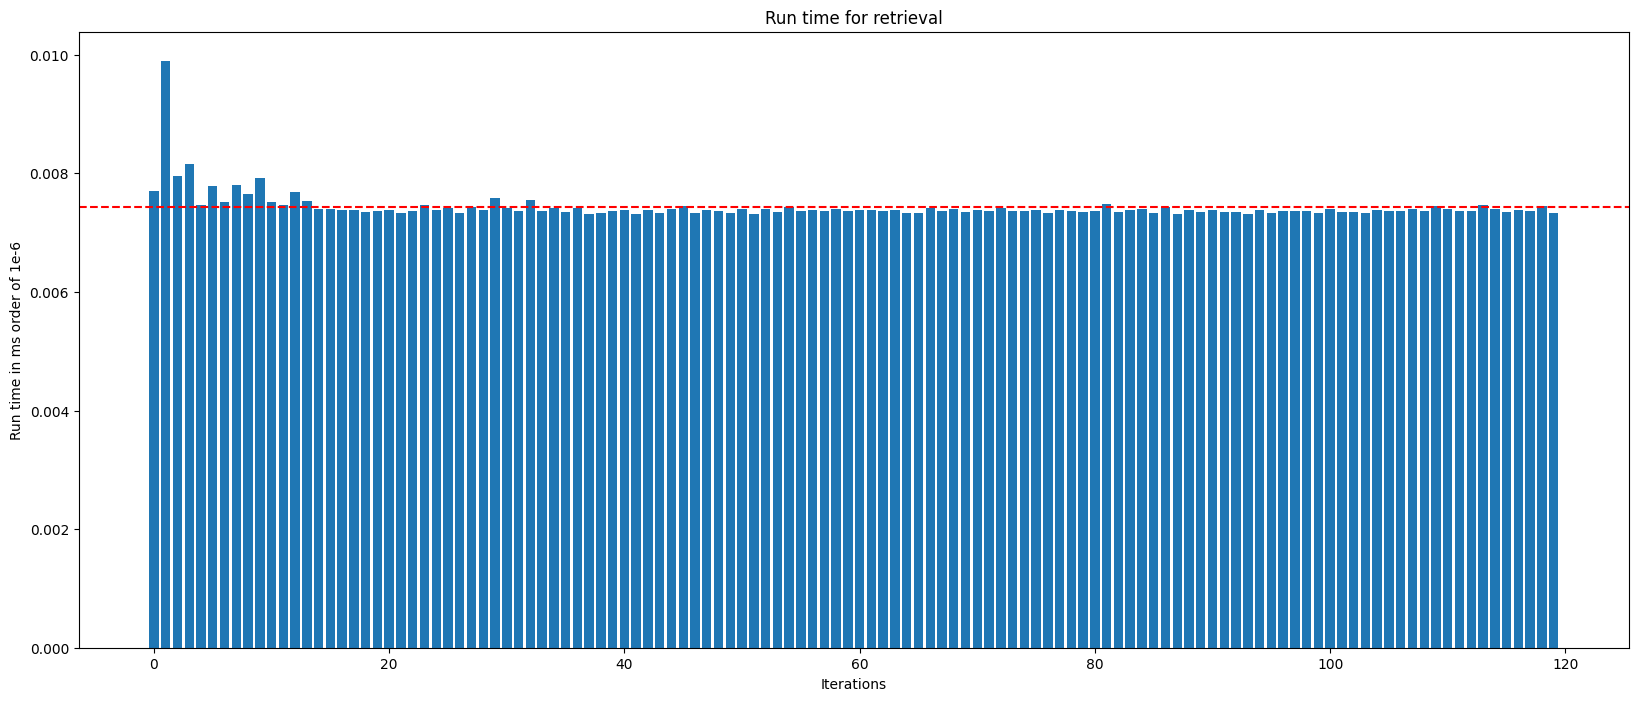

Average run times:  0.007433648251268702


In [224]:
### Bubble sort experiment code goes here
n = 120 #number of trials
run_times1 = []

for _ in range(n):

    randomListBubble = list(global_random_list)
    bubbleSorted = BubbleSort(randomListBubble)
    start1 = timeit.default_timer()
    bubbleSorted.bubble_sort()
    stop1 = timeit.default_timer()
    run_times1.append(stop1-start1)

draw_plot(run_times1)
print("Average run times: ", sum(run_times1)/n)



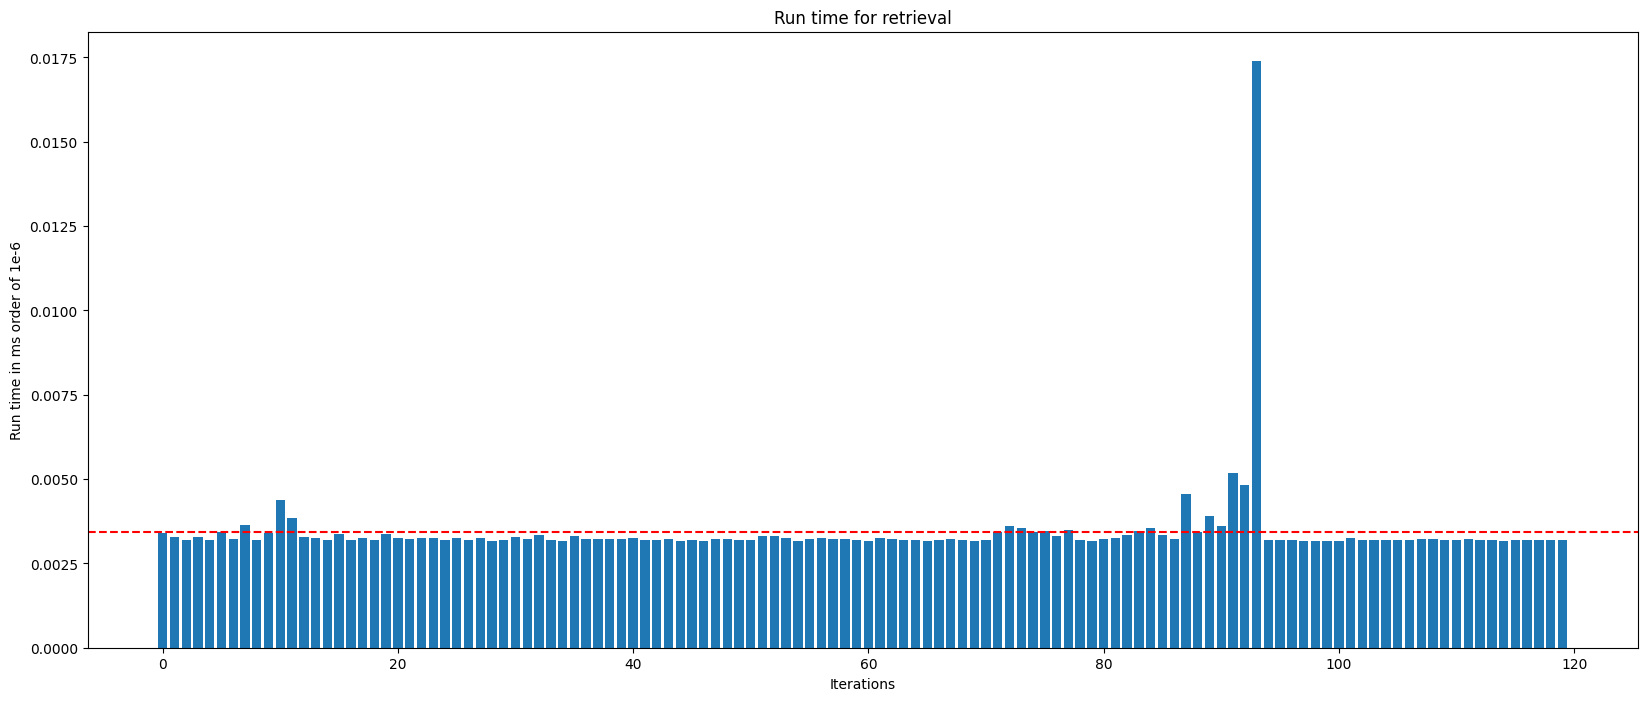

Average run times:  0.003431049679056741


In [225]:
## Insertion sort experiment code goes here

n = 120 #number of trials
run_times2 = []
for _ in range(n):

    randomListInsertion = list(global_random_list)
    insertedSorted = InsertionSort(randomListInsertion)
    start2 = timeit.default_timer()
    insertedSorted.insertion_sort()
    stop2 = timeit.default_timer()

    run_times2.append(stop2-start2)

draw_plot(run_times2)
print("Average run times: ", sum(run_times2)/n)

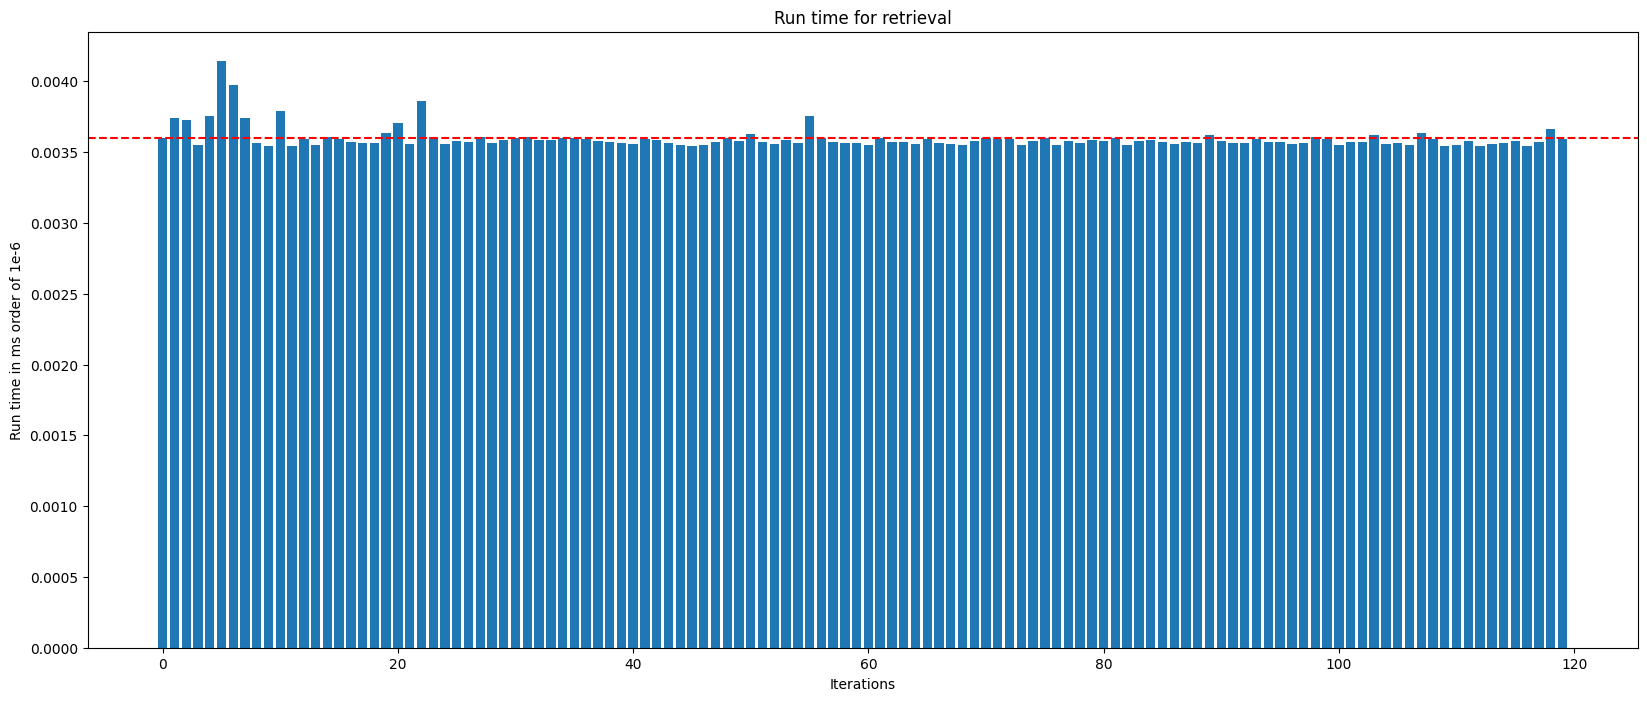

Average run times:  0.003597058682741287


In [226]:
### Selection sort experiment code goes here

n = 120 #number of trials
run_times3 = []
for _ in range(n):

    randomListSelection = list(global_random_list)
    selectionSorted = SelectionSort(randomListSelection)
    start3 = timeit.default_timer()
    selectionSorted.selection_sort()
    stop3 = timeit.default_timer()

    run_times3.append(stop3-start3)


draw_plot(run_times3)
print("Average run times: ", sum(run_times3)/n)

You would notice that certain sorting algorithms have better time complexity (or performance) than others. Write below a reflection of your observations. Can you confidently compare the performance across the 3 algorithms? Why does certain algorithm perform better than the other? What are the various factors impacting the best performing and the worst performing algorithm. Write a few sentences answering each of the above questions. Also describe any other observation you found important.

**Reflection**:

In the observed experiment, it was noted that Bubble Sort consistently took around twice as long as Insertion Sort and Selection Sort. This performance difference can be attributed to the time complexity of each sorting algorithm.

Bubble Sort has a worst-case time complexity of O(n^2), where n is the number of elements in the list. It involves pairwise comparisons and swaps, iterating through the list multiple times until it is sorted. This makes Bubble Sort less efficient, especially as the size of the list increases. In the case of 120 trials with a list of length 200 and a max value of 1000, the time complexity becomes a significant factor, leading to longer execution times.

In summary, the observed performance differences among Bubble Sort, Insertion Sort, and Selection Sort can be attributed to their distinct approaches to sorting and their sensitivity to the size and structure of the input data. The trade-offs between time complexity, adaptability, and the specific characteristics of the dataset impact the overall efficiency of each algorithm.


---

##### A3. Compute the performance of above 3 algorithms on a different list sizes.

The <code> create_custom_list()</code> helps you create lists of varying lengths and range of numbers. Plot a **line chart** that shows the performance of each algorithm on different list sizes ranging between 1 - 100,000 integers. If you think about this question, you are essentially plotting the time complexity on various list sizes. 

In [227]:
def draw_line_plot(array1, array2, array3):
    # Check if all arrays have the same length
    if len(array1) != len(array2) or len(array1) != len(array3):
        raise ValueError("All arrays must have the same length")

    # Create a figure and axis
    fig, ax = plt.subplots()

    # Plot the lines
    ax.plot(array1, label='Bubble Sort')
    ax.plot(array2, label='Insertion Sort')
    ax.plot(array3, label='Selection Sort')

    # Add labels and legend
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Run Time')
    ax.set_title('Line Plot of Three Arrays')
    ax.legend()

    # Show the plot
    plt.show()


In [228]:
# # ### Bubble sort experiment code goes here

# n = 20
# A3run_times1 = []
# A3run_times2 = []
# A3run_times3 = []

# for i in tqdm_notebook(range(1,10000,200)):

#     A3randlist = create_list_custom(i,10000)
#     total1 = 0
#     total2 = 0
#     total3 = 0

#     for _ in range(n):
        
#         #bubble
#         A3bubbleSorted = BubbleSort(list(A3randlist))
#         A3start1 = timeit.default_timer()
#         A3bubbleSorted.bubble_sort()
#         A3stop1 = timeit.default_timer()
#         total1 = (A3stop1-A3start1)

#         #insertion
#         A3InsertionSorted = InsertionSort(list(A3randlist))
#         A3start2 = timeit.default_timer()
#         A3InsertionSorted.insertion_sort()
#         A3stop2 = timeit.default_timer()
#         total2 = (A3stop2-A3start2)

#         #selection
#         A3SelectionSorted = SelectionSort(list(A3randlist))
#         A3start3 = timeit.default_timer()
#         A3SelectionSorted.selection_sort()
#         A3stop3 = timeit.default_timer()
#         total3 = (A3stop3-A3start3)
#     A3run_times1.append(total1/n)
#     A3run_times2.append(total2/n)
#     A3run_times3.append(total3/n)

# draw_line_plot(A3run_times1, A3run_times2, A3run_times3)
# print("Average bubble run time: ", sum(A3run_times1)/n)
# print("Average insertion run time: ", sum(A3run_times2)/n)
# print("Average selection run time: ", sum(A3run_times3)/n)

Describe you results here. What did you observe when comparing the charts? Which algorithm was more performant and why?

**Reflection** :

Bubble Sort: This algorithm has the highest average run time among the three. As the list size increases, Bubble Sort's time complexity tends to grow extremely high, making it less efficient for larger datasets. It repeatedly iterates through large lists.

Insertion Sort: The average run time for Insertion Sort is the lowest out of the three. Insertion Sort has a time complexity of O(n^2), similar to Bubble Sort, but it tends to perform better in practice. It builds the sorted portion of the list by repeatedly taking an element from the unsorted part and inserting it into its correct position in the sorted part.

Selection Sort: The average run time for Selection Sort is between that of Bubble Sort and Insertion Sort. Selection Sort also has a time complexity of O(n^2). It repeatedly selects the minimum element from the unsorted portion of the list and swaps it with the first unsorted element. This process continues until the entire list is sorted.

Observations:

As expected, the run times for all three algorithms increase as the list size grows.
Bubble Sort consistently shows the highest average run time, indicating its lower efficiency compared to the other two algorithms.
Insertion Sort performs better than Bubble Sort and selection sort but still has an exponential time complexity.
Selection Sort performs in between Bubble Sort and Insertion Sort, but its performance is not significantly better than Bubble Sort.
Insertion sort and Selection sort are very similar in runtime.

In conclusion, based on the provided data, Insertion Sort appears to be the most performant among the three algorithms for the given dataset and list sizes.

---

##### A4. Compute the performance of above 3 algorithms on a different list "states".

Using the same above list generation function (or writing a function of your own), create two different lists states: 

- A state where the list is **near** sorted.
- A state where the list is completely unsorted.

HINTS: 

- You can implement a "controlled" Quicksort algorithm for such a function. While you can find many implementations of such a function online, significant number of those solutions originate from this psuedocode [Generating Sorted Lists of Random Numbers](https://dl.acm.org/doi/pdf/10.1145/355900.355907). 

- You can modify the list generation code given above to create the above list examples.

Compare the performance of all 3 sorting algorithms on these two lists. Plot their performance on bar chart and display them here. 

In [229]:
### Generate nearly sorted and unsorted lists

def generate_near_sorted_list(size, percentage=0.1):
    
    def controlled_quicksort(arr, low, high):
        if low < high:
            pivot_index = random.randint(low, high)
            pivot = arr[pivot_index]

            # Partition the array
            i = low - 1
            for j in range(low, high):
                if arr[j] < pivot:  # Corrected: Use strict comparison for elements less than the pivot
                    i += 1
                    arr[i], arr[j] = arr[j], arr[i]

            arr[i + 1], arr[pivot_index] = arr[pivot_index], arr[i + 1]

            controlled_quicksort(arr, low, i)
            controlled_quicksort(arr, i + 2, high)

    near_sorted_list = list(range(1, size + 1))
    shuffle_range = int(size * percentage)

    for _ in range(shuffle_range):
        i, j = random.randint(0, size - 1), random.randint(0, size - 1)
        near_sorted_list[i], near_sorted_list[j] = near_sorted_list[j], near_sorted_list[i]

    controlled_quicksort(near_sorted_list, 0, size - 1)
    return near_sorted_list


def generate_unsorted_list(size):
    unsorted_list = list(range(1, size + 1))
    random.shuffle(unsorted_list)
    return unsorted_list


n = 120
list_size = 100

In [230]:
### Bar chart plot function

def draw_bar_plot(run_arr, labels, sortTitle):
    x = np.arange(len(run_arr[0]))  # Assuming all arrays have the same length
    fig = plt.figure(figsize=(20, 8))
    
    for i, data in enumerate(run_arr):
        plt.bar(x + i * 0.2, data, width=0.3, label=labels[i])

    plt.axhline(np.mean(run_arr[0]), color="red", linestyle="--", label="Avg Near Sorted")
    plt.axhline(np.mean(run_arr[1]), color="blue", linestyle="--", label="Avg Unsorted")

    plt.xlabel("Iterations")
    plt.ylabel("Run time in ms order of 1e-6")
    plt.title("Run time for "+sortTitle+" Sort")
    plt.legend()
    plt.show()


  0%|          | 0/120 [00:00<?, ?it/s]

[0.000481792027130723, 0.0004826659569516778, 0.000483584008179605, 0.0004633750068023801, 0.00046683300752192736, 0.0005134999519214034, 0.00046495802234858274, 0.0004790829261764884, 0.000515500083565712, 0.0004576250212267041, 0.00046737492084503174, 0.00046437501441687346, 0.0004831659607589245, 0.0005115000531077385, 0.00047033303417265415, 0.0004917499609291553, 0.0004621670814231038, 0.0005017919465899467, 0.0004751670639961958, 0.0004903329536318779, 0.00046020804438740015, 0.0004652079660445452, 0.0004660829436033964, 0.00046191702131181955, 0.0004761660238727927, 0.00045658298768103123, 0.00046029197983443737, 0.0004600000102072954, 0.00046433310490101576, 0.0004712500376626849, 0.0004740840522572398, 0.0004862080095335841, 0.00045779196079820395, 0.0004987920401617885, 0.00047379208263009787, 0.000504916999489069, 0.0004737499402835965, 0.0004978750366717577, 0.0004632089985534549, 0.00046687491703778505, 0.00045995903201401234, 0.0004630829207599163, 0.00046545802615582943,

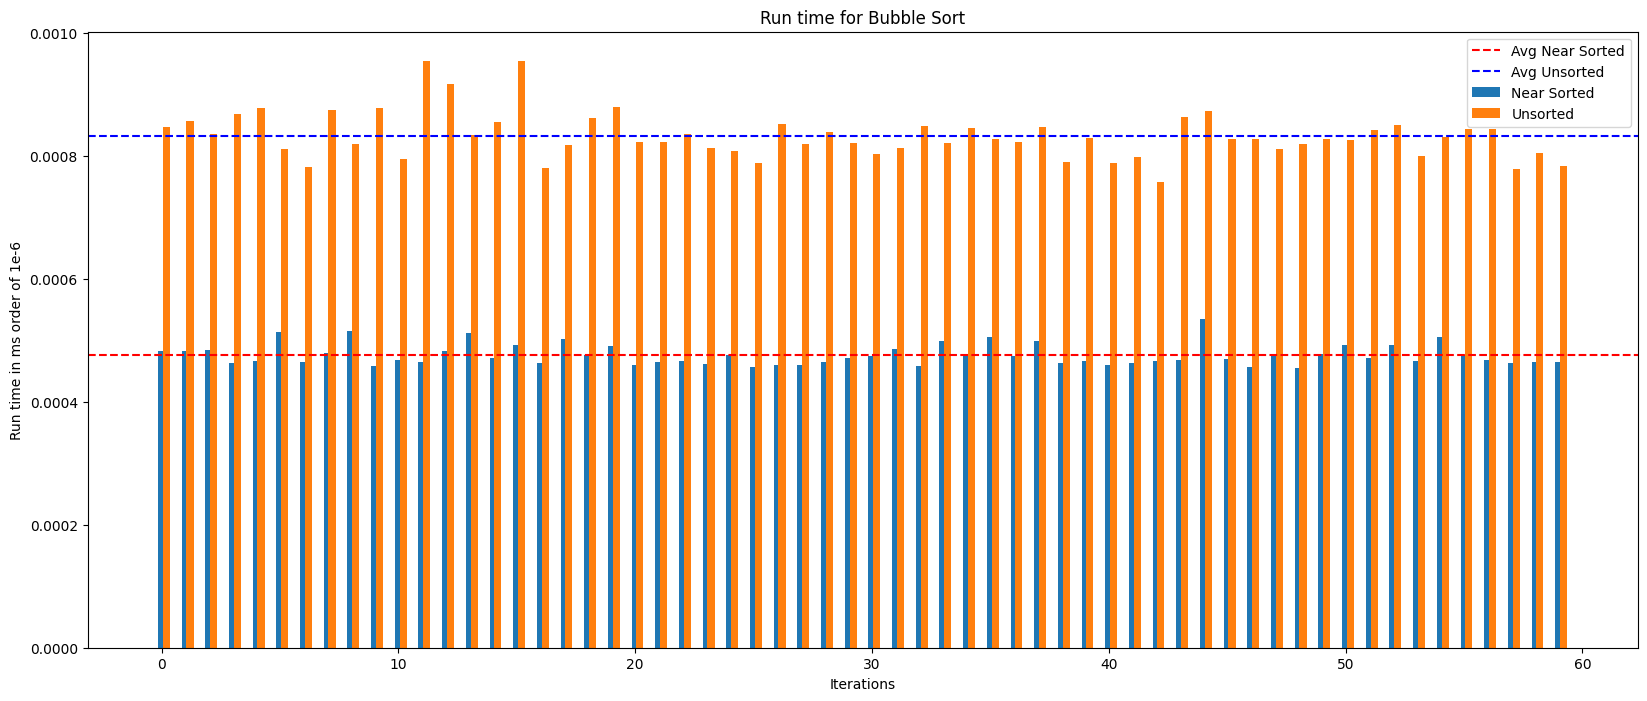

In [231]:
### Bubble sort experiment code goes here


A3_bubble_nearSorted_run_times = []
A3_bubble_unSorted_run_times = []

for _ in tqdm_notebook(range(n)):
    nearS = generate_near_sorted_list(list_size)
    unS = generate_unsorted_list(list_size)

    nearSorted = BubbleSort(nearS)
    A4start1 = timeit.default_timer()
    nearSorted.bubble_sort()
    A4stop1 = timeit.default_timer()
    if (_ % 2 == 0):
        A3_bubble_nearSorted_run_times.append(A4stop1 - A4start1)

    unSorted = BubbleSort(unS)
    A4start2 = timeit.default_timer()
    unSorted.bubble_sort()
    A4stop2 = timeit.default_timer()
    if (_ % 2 == 0):
        A3_bubble_unSorted_run_times.append(A4stop2 - A4start2)

print(A3_bubble_nearSorted_run_times)
draw_bar_plot([A3_bubble_nearSorted_run_times, A3_bubble_unSorted_run_times], ['Near Sorted', 'Unsorted'], "Bubble")


  0%|          | 0/120 [00:00<?, ?it/s]

[0.0004153329646214843, 0.00039624993223696947, 0.0003971249097958207, 0.0004456669557839632, 0.0004249579505994916, 0.0004096659831702709, 0.00039654201827943325, 0.0004551660967990756, 0.0003987499512732029, 0.0003992499550804496, 0.00040195893961936235, 0.000395915936678648, 0.00048183288890868425, 0.0003974999999627471, 0.0003969999961555004, 0.0003962080227211118, 0.0003983329515904188, 0.00039804098196327686, 0.00039716705214232206, 0.0003956250147894025, 0.0003984590293839574, 0.00045245897490531206, 0.0003976250300183892, 0.0003969579702243209, 0.00039562489837408066, 0.0003979169996455312, 0.0003975830040872097, 0.00041266705375164747, 0.0003964999923482537, 0.000399709097109735, 0.00039499998092651367, 0.0004101250087842345, 0.0003974579740315676, 0.00041416706517338753, 0.0004427499370649457, 0.00044108391739428043, 0.0003980000037699938, 0.00039758405182510614, 0.00039720803033560514, 0.0003964169882237911, 0.0004604170098900795, 0.00039770803414285183, 0.000583957997150719

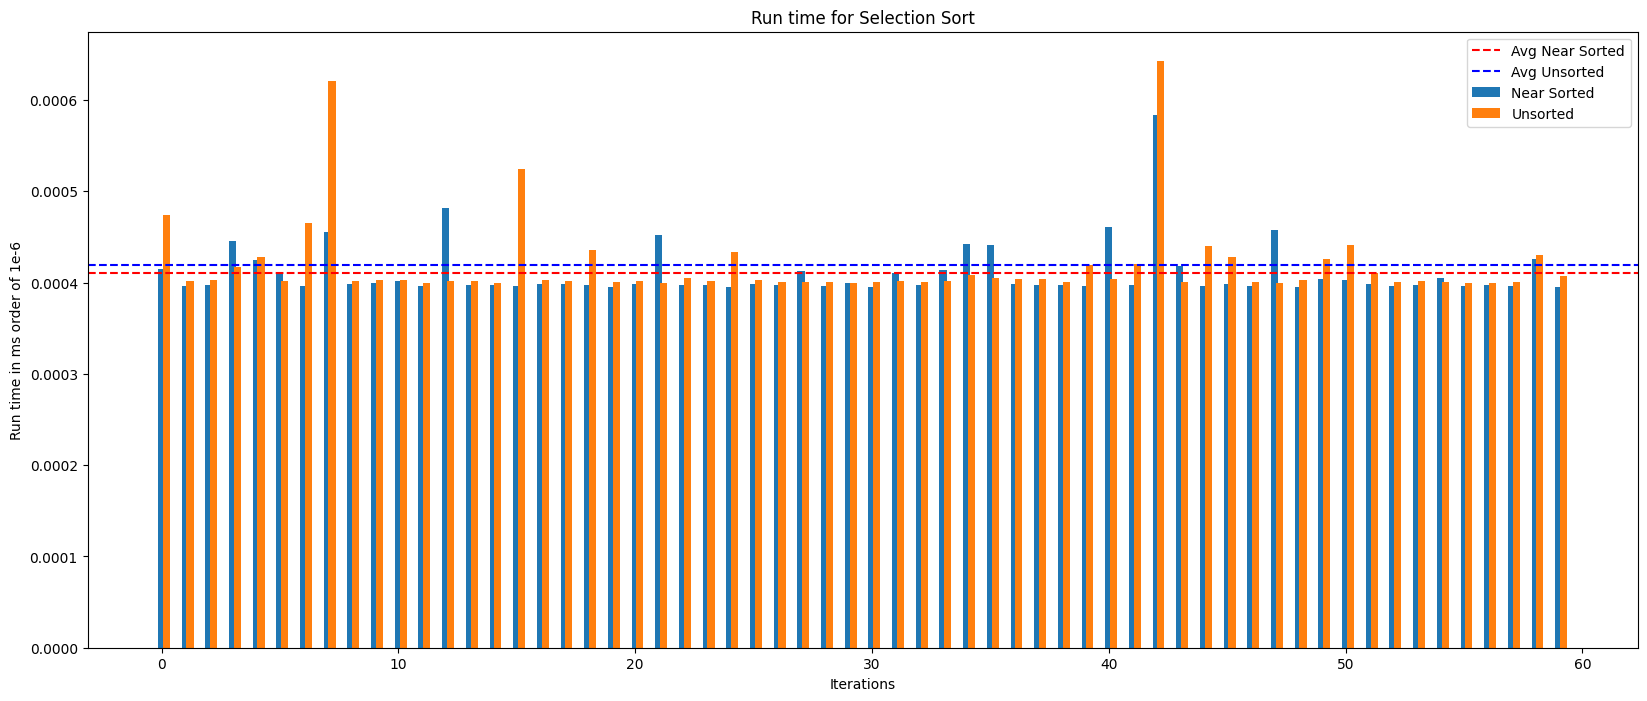

In [232]:
### Selection sort experiment code goes here


A3_selection_nearSorted_run_times = []
A3_selection_unSorted_run_times = []

for _ in tqdm_notebook(range(n)):
    nearS = generate_near_sorted_list(list_size)
    unS = generate_unsorted_list(list_size)

    nearSorted = SelectionSort(nearS)
    A4start3 = timeit.default_timer()
    nearSorted.selection_sort()
    A4stop3 = timeit.default_timer()
    if (_ % 2 == 0):
        A3_selection_nearSorted_run_times.append(A4stop3 - A4start3)

    unSorted = SelectionSort(unS)
    A4start4 = timeit.default_timer()
    unSorted.selection_sort()
    A4stop4 = timeit.default_timer()
    if (_ % 2 == 0):
        A3_selection_unSorted_run_times.append(A4stop4 - A4start4)

print(A3_selection_nearSorted_run_times)
draw_bar_plot([A3_selection_nearSorted_run_times, A3_selection_unSorted_run_times], ['Near Sorted', 'Unsorted'], "Selection")

  0%|          | 0/120 [00:00<?, ?it/s]

[5.3458032198250294e-05, 5.0042057409882545e-05, 2.3542088456451893e-05, 2.4792039766907692e-05, 4.241697024554014e-05, 2.574990503489971e-05, 3.38749960064888e-05, 3.308302257210016e-05, 3.0416063964366913e-05, 4.2625004425644875e-05, 2.8333044610917568e-05, 5.241704639047384e-05, 4.025001544505358e-05, 4.3082982301712036e-05, 3.5415985621511936e-05, 3.91670037060976e-05, 4.183291457593441e-05, 3.7792022339999676e-05, 4.091602750122547e-05, 2.550007775425911e-05, 3.8707978092134e-05, 3.0458089895546436e-05, 3.3374992199242115e-05, 4.704098682850599e-05, 3.0209077522158623e-05, 4.966696724295616e-05, 3.937492147088051e-05, 3.704102709889412e-05, 3.683299291878939e-05, 3.2374984584748745e-05, 4.837499000132084e-05, 3.804208245128393e-05, 3.316695801913738e-05, 2.775003667920828e-05, 4.924996756017208e-05, 3.204098902642727e-05, 3.78340482711792e-05, 4.058296326547861e-05, 3.829202614724636e-05, 3.658398054540157e-05, 4.549999721348286e-05, 4.566693678498268e-05, 3.670796286314726e-05, 4

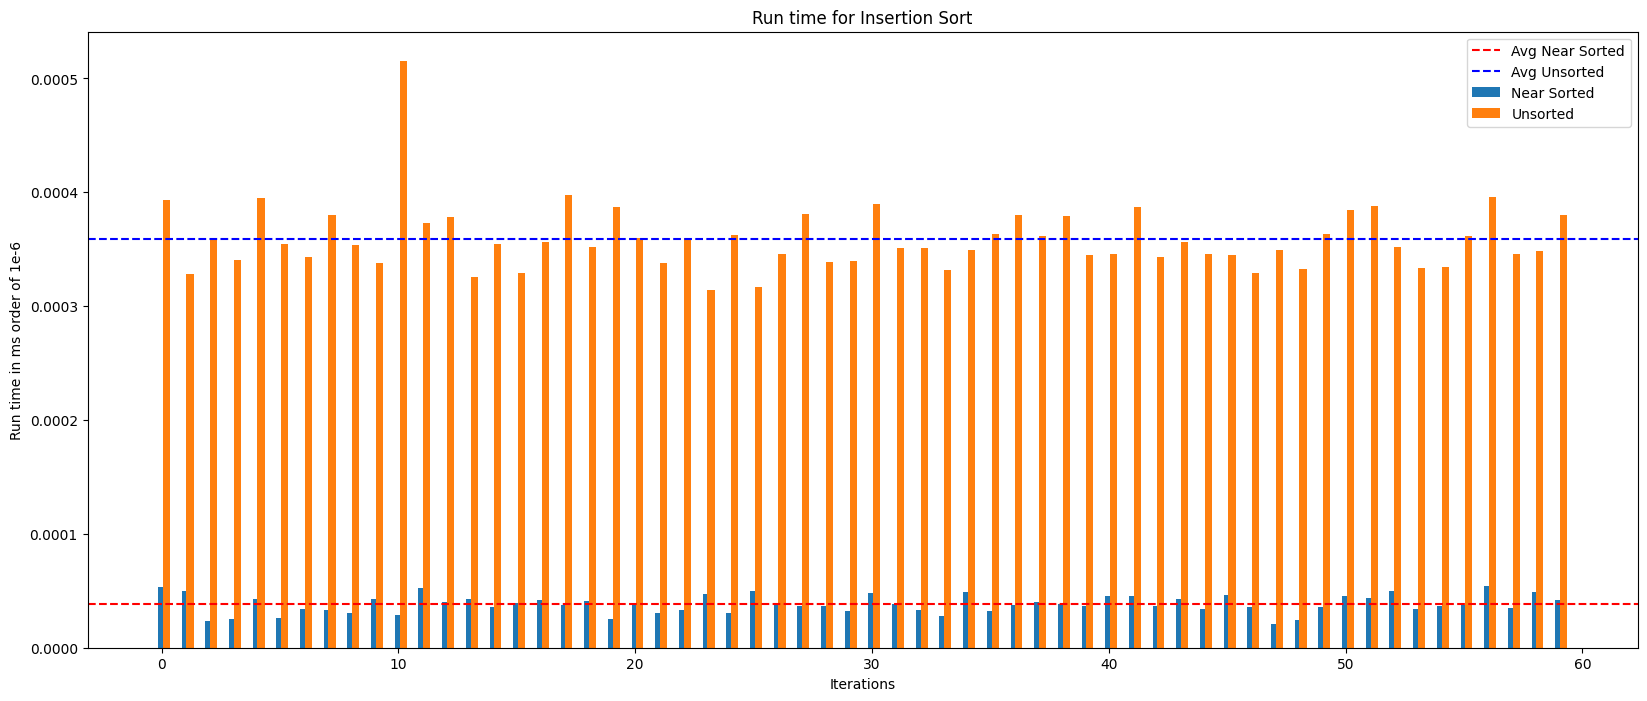

In [233]:
### Insertion sort experiment code goes here


A3_insertion_nearSorted_run_times = []
A3_insertion_unSorted_run_times = []

for _ in tqdm_notebook(range(n)):
    nearS = generate_near_sorted_list(list_size)
    unS = generate_unsorted_list(list_size)

    nearSorted = InsertionSort(nearS)
    A4start5 = timeit.default_timer()
    nearSorted.insertion_sort()
    A4stop5 = timeit.default_timer()
    if (_ % 2 == 0):
        A3_insertion_nearSorted_run_times.append(A4stop5 - A4start5)

    unSorted = InsertionSort(unS)
    A4start6 = timeit.default_timer()
    unSorted.insertion_sort()
    A4stop6 = timeit.default_timer()
    if (_ % 2 == 0):
        A3_insertion_unSorted_run_times.append(A4stop6 - A4start6)

print(A3_insertion_nearSorted_run_times)
draw_bar_plot([A3_insertion_nearSorted_run_times, A3_insertion_unSorted_run_times], ['Near Sorted', 'Unsorted'], "Insertion")

Describe you observations here. Which algorithm performs best / worst for sorted/near sorted lists and why? Does the performance vary significantly? Describe which runs times were higher and why do you think that is?

**Reflection** :

_Q: Which algorithm performs best / worst for sorted/near sorted lists and why?_

Best for near sorted: insertion sort.
Worst for near sorted: bubble and selection sort

_Q: Does the performance vary significantly?_

The performance between each algorithm varies. Bubble sort's near sorted runtimes are about twice as fast as its unsorted runtimes. Selection sort's near sorted and unsorted runtimes are relatively the same. Insertion sort's near sorted runtimes are extremely faster in comparison to the unsorted runtimes.

_Q: Describe which runs times were higher and why do you think that is?_

The highest run times was unsorted bubble with ~0.0007ms. Then with ~0.0004ms there was near sorted bubble, near sorted and unsorted selection sort.

### Part B

In the class, we discussed three implementations of Binary Search. 

In [234]:
def binary_search_1(item_list, to_find):
    lower=0
    upper=len(item_list)-1
    while lower < upper:
        mid = (lower+upper)//2
        if item_list[mid] == to_find:
            return True
        if item_list[mid] < to_find:
            lower = mid+1
        else:
            upper=mid
    return item_list[lower]==to_find

In [235]:
def binary_search_2(item_list, to_find):
    lower=0
    upper=len(item_list)-1
    while lower <= upper:
        mid = (lower+upper)//2
        if item_list[mid] == to_find:
            return True
        if item_list[mid] < to_find:
            lower = mid+1
        else:
            upper=mid-1
    return item_list[lower]==to_find

In [236]:
def binary_search_3(item_list, to_find):
    left=0
    right=len(item_list)-1
    while left != right:
        mid = (left+right)//2
        if item_list[mid] < to_find:
            left = mid+1
        elif item_list[mid] > to_find:
            right = mid
        else:
            return True
    return item_list[left]==to_find

Compare the performance of each implementation (or variation) with two lists:

1. List is odd numbered (minimum 1000 integers)
1. List is even numbered (minimum 1000 integers)

Run the above experiments when the item to be found is:
1. At the begining of the list.
1. Towards the end of the list.
1. Right at the middle of the list.

The above three combinations would yield 3X2 experiments. Provide detailed outline of the experiments, plots, and a brief description of the observations in the reflections section.

In [237]:
#B Part 1  
blist=[random.randint(1, 10000) for i in range(1001)]
blist.sort()
global blist
middle_blist=len(blist)//2
beg_blist=blist[:middle_blist]
end_blist=blist[middle_blist:]
elemb=random.choice(beg_blist)
elemm=blist[middle_blist]
eleme=random.choice(end_blist)
item_list_even=[random.randint(1, 10000)for i in range(1000)]
item_list_even.sort()
item_list_odd=[random.randint(1, 10000) for i in range(1001)]
item_list_odd.sort()
global item_list_odd
global item_list_even
elemeven=random.choice(item_list_even)
elemodd=random.choice(item_list_odd)

In [238]:
def measure_time(function, *args):
    start_time = timeit.default_timer()
    function(*args)
    return timeit.default_timer() - start_time


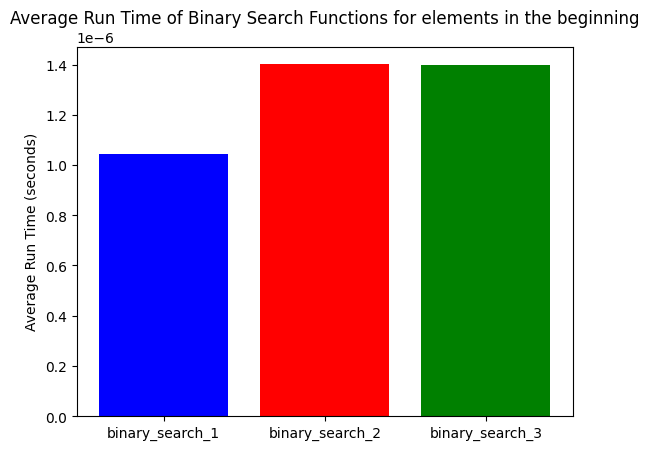

In [239]:
#BEGINNING

btimes = []

bavg_time_1 = sum(measure_time(binary_search_1, blist, elemb) for _ in range(1000)) / 1000
btimes.append(bavg_time_1)

bavg_time_2 = sum(measure_time(binary_search_2, blist, elemb) for _ in range(1000)) / 1000
btimes.append(bavg_time_2)

bavg_time_3 = sum(measure_time(binary_search_3, blist, elemb) for _ in range(1000)) / 1000
btimes.append(bavg_time_3)

bfunctions = ['binary_search_1', 'binary_search_2', 'binary_search_3']
plt.bar(bfunctions, btimes, color=['blue', 'red', 'green'])
plt.ylabel('Average Run Time (seconds)')
plt.title('Average Run Time of Binary Search Functions for elements in the beginning')
plt.show()

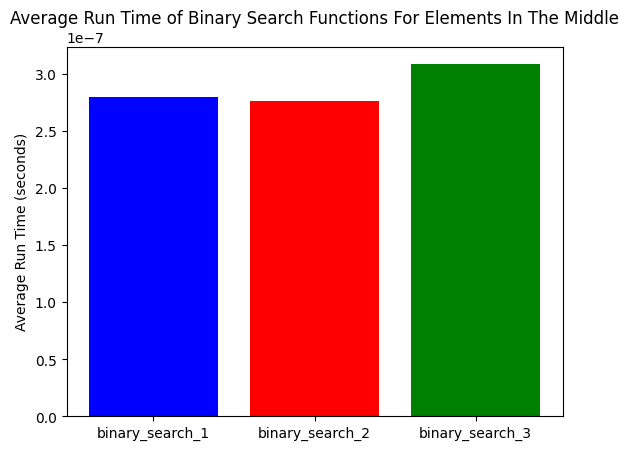

In [240]:
#MIDDLE

mtimes=[]

mavg_time_1=sum(measure_time(binary_search_1, blist, elemm) for _ in range(1000)) / 1000
mtimes.append(mavg_time_1)

mavg_time_2=sum(measure_time(binary_search_2, blist, elemm) for _ in range(1000)) / 1000
mtimes.append(mavg_time_2)

mavg_time_3=sum(measure_time(binary_search_3, blist, elemm) for _ in range(1000)) / 1000
mtimes.append(mavg_time_3)

mfunctions = ['binary_search_1', 'binary_search_2', 'binary_search_3']
plt.bar(mfunctions, mtimes, color=['blue', 'red', 'green'])
plt.ylabel('Average Run Time (seconds)')
plt.title('Average Run Time of Binary Search Functions For Elements In The Middle')
plt.show()

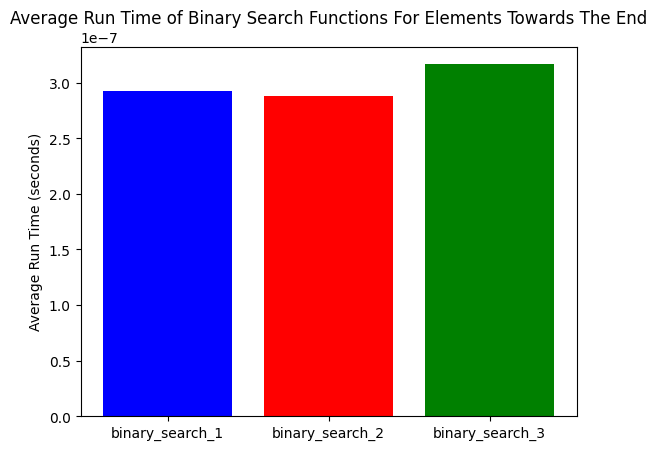

In [241]:
#END

etimes=[]

eavg_time_1=sum(measure_time(binary_search_1, blist, elemm) for _ in range(1000)) / 1000
etimes.append(eavg_time_1)

eavg_time_2=sum(measure_time(binary_search_2, blist, elemm) for _ in range(1000)) / 1000
etimes.append(eavg_time_2)

eavg_time_3=sum(measure_time(binary_search_3, blist, elemm) for _ in range(1000)) / 1000
etimes.append(eavg_time_3)

efunctions = ['binary_search_1', 'binary_search_2', 'binary_search_3']
plt.bar(efunctions, etimes, color=['blue', 'red', 'green'])
plt.ylabel('Average Run Time (seconds)')
plt.title('Average Run Time of Binary Search Functions For Elements Towards The End')
plt.show()

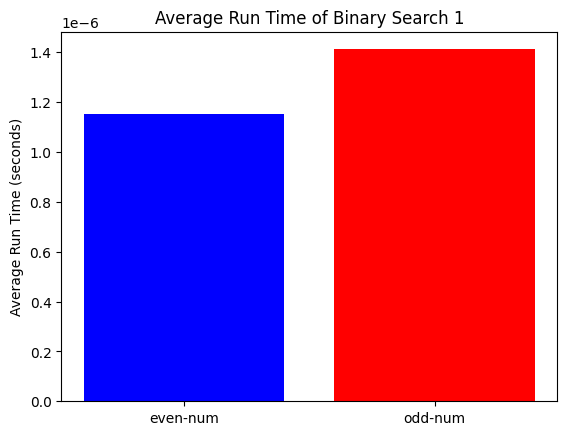

In [242]:
#BINARY SEARCH 1

binary_search_1_time = []

avg_time_even_1 = sum(measure_time(binary_search_1, item_list_even, elemeven) for _ in range(1000)) / 1000
binary_search_1_time.append(avg_time_even_1)

avg_time_odd_1 = sum(measure_time(binary_search_1, item_list_odd, elemodd) for _ in range(1000)) / 1000
binary_search_1_time.append(avg_time_odd_1)


b1functions = ['even-num','odd-num']
plt.bar(b1functions, binary_search_1_time, color=['blue', 'red'])
plt.ylabel('Average Run Time (seconds)')
plt.title('Average Run Time of Binary Search 1')
plt.show()

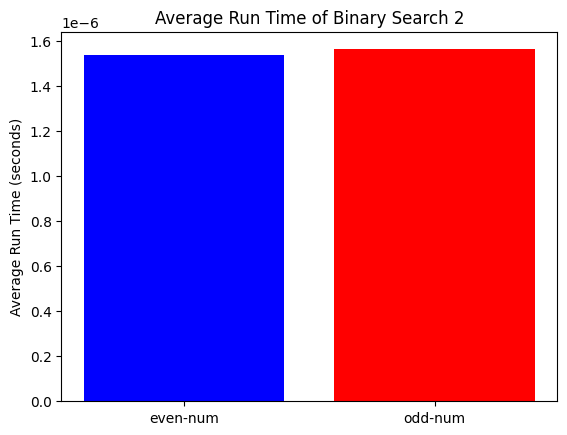

In [243]:
#BINARY SEARCH 2

binary_search_2_time = []

avg_time_even_2 = sum(measure_time(binary_search_2, item_list_even, elemeven) for _ in range(1000)) / 1000
binary_search_2_time.append(avg_time_even_2)

avg_time_odd_2 = sum(measure_time(binary_search_2, item_list_odd, elemodd) for _ in range(1000)) / 1000
binary_search_2_time.append(avg_time_odd_2)


b2functions = ['even-num','odd-num']
plt.bar(b2functions, binary_search_2_time, color=['blue', 'red', 'green'])
plt.ylabel('Average Run Time (seconds)')
plt.title('Average Run Time of Binary Search 2')
plt.show()

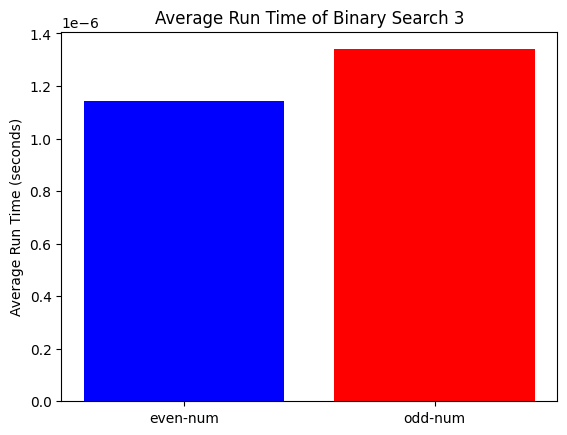

In [244]:
#BINARY SEARCH 3

binary_search_3_time = []

avg_time_even_3 = sum(measure_time(binary_search_3, item_list_even, elemeven) for _ in range(1000)) / 1000
binary_search_3_time.append(avg_time_even_3)

avg_time_odd_3 = sum(measure_time(binary_search_3, item_list_odd, elemodd) for _ in range(1000)) / 1000
binary_search_3_time.append(avg_time_odd_3)

b3functions = ['even-num','odd-num']
plt.bar(b3functions, binary_search_3_time, color=['blue', 'red', 'green'])
plt.ylabel('Average Run Time (seconds)')
plt.title('Average Run Time of Binary Search 3')
plt.show()

**Reflection**:

PART 1 - FIRST 9 EXPERIMENTS
In these experiments, we will be checking on average how much time the three different binary search algorithms takes on average to find an element in three different positions: towards the beginning , right at the middle and towards the end. The experiments will be using various modules in python (such as matplotlib,random,time)

Here, a random list of 1001 elements ranging from 1 to 10000 will be created. Then the list is sorted(using .sort). Then the element in the middle is found by using floor division on the length of the list by 2 (to find the index of the middle element) and later calling that index on the list to get the middle element.

The list is later split into 3 : the beginning of the list, the middle and the end of the list. All the elements leading upto the middle element of the sorted list is classified as the beginning of the list and all the elements after the middle element is classified as the end of the list. In order to make code execution simpler, separate lists have been created.

Then using random.choice on the beginning and the end list, a random element on both the lists were obtained, on which the binary search algorithms were used to find the obtained element(through random.choice) from the whole list.

The average time taken to find the element in the list is calculated and the time is recorded and the graph is plotted using matplotlib.

The three binary search algorithms differ in the following ways:

Binary Search 1 utilizes a simple terminating condition (while lower < upper). It performs a single comparison per iteration.

Binary Search 2 has a similar loop condition with Binary Search 1 (while lower <= upper) but the <= adjusts the upper bound differently. It may perform one additional iteration compared to Binary Search 1.

Binary Search 3 uses a terminating condition of (while left != right), adjusting the right bound based on the midpoint value.

Observations:

Algorithms 1 and 2 differ primarily in how they adjust the upper bound but will have a similar runtime Algorithm 3 has a distinct terminating condition that may influence its performance.

The graphs obtained when regenerated may change. This is because when the code is regenerated, the list and the position of the element to be searched gets regenerated and hence, changes . This results in all the three binary search algorithms behaving differently, resulting in varying graphs.

PART 2 - LAST 6 EXPERIMENTS
In these experiments, we will be checking on average how much time the three different binary search algorithms takes on average to find an element in an even and an odd numbered list. The experiments will be using various modules in python (such as matplotlib,random,time)

Here, a random list of 1001 elements and a random list of 1000 elements, ranging from 1 to 10000 will be created. Then the list is sorted(using .sort).

Then, using random.choice, a random element on both the lists were obtained, on which the binary search algorithms were used to find the obtained element(through random.choice) from the whole list.

The average time taken to find the element in the list is calculated and the time is recorded and the graph is plotted using matplotlib.

Observation: Algorithms 1 and 2 have a similar runtime but may show some differences due to the adjustment of the upper bound. Algorithm 3 has a distinct terminating condition that may influence its performance,especially for odd numbered list

1.The length of the list influences the runtime of binary search algorithms. 2.Odd-length lists may require slightly more time as compared to even-length lists due to the presence of the middle element.



---
---

### Part C

Recall that I discussed in the class, the possibility of "reducing the comparisons" in Binary Search implementation. One solution came up is to remove the comparison with "mid". If you design an experiment to test this, you will soon realize that while this speeds up the execution time by reducing the number of comparisons needed, it fails when the element to be searched is right in the middle.  So are there any ways to improve the speed of Binary Search that is not dependent on data? The answer is recursion! In this section, implement a Binary Search recursively.

In [245]:
def binary_search_4(item_list, to_find):
    n=len(item_list)
    low=0
    high=n-1
    if low <= high:
        mid = low + (high - low) // 2

        
        if item_list[mid] == to_find:
            return True

        
        elif item_list[mid] > to_find:
            return binary_search_4(item_list[:mid], to_find)

        else:
            return binary_search_4(item_list[mid + 1:],to_find )

    else:
        
        return False   

Run all the experiments in Part B comapring all 4 implementations under all 6 cases. Plot the timings, and describe the results in the below section. Write a short description of your observation; why is recursion better in this case?

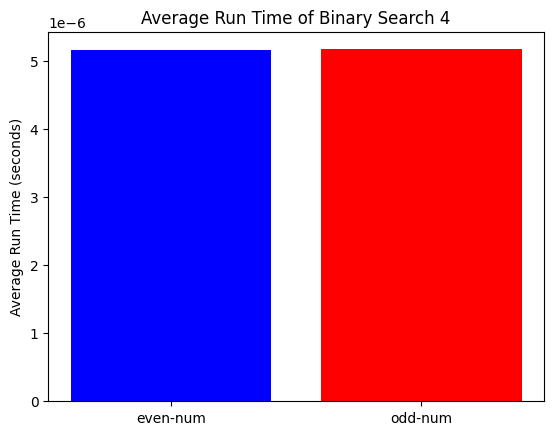

In [246]:
#BINARY SEARCH 4

binary_search_4_time = []

avg_time_even_4 = sum(measure_time(binary_search_4, item_list_even, elemeven) for _ in range(1000)) / 1000
binary_search_4_time.append(avg_time_even_4)

avg_time_odd_4 = sum(measure_time(binary_search_4, item_list_odd, elemodd) for _ in range(1000)) / 1000
binary_search_4_time.append(avg_time_odd_4)

b4functions = ['even-num','odd-num']
plt.bar(b4functions, binary_search_4_time, color=['blue', 'red', 'green'])
plt.ylabel('Average Run Time (seconds)')
plt.title('Average Run Time of Binary Search 4')
plt.show()

##### Result Discussion:

Binary search _4 is an algorithm that carries out binary search with recursion. It is seen that this binary search algorithm is slightly better in even numbered lists as comapred to odd numbered lists. This is beacuse while calculating mid , the list gets divided into 2 equal halves, which improves the efficiency of the algorithm.

Binary search_4 may not be faster than the other iteraticve algorithms due to the overhead function calls and memory usage. However, the code is more clear and concise. Recursion is an easier to implement than the binary_search1,2 and 3.

---
---

### PART D

Now that you are comfortable in designing experiments, in this section, use the implementations of **Heap**, **Merge**, and **Quick** sort discussed in class and run suitable experiments to compare the runtimes of these three algorithms. 

Hint: it should become clear where Quick sort gets its name.

In [247]:
def create_custom_list(length, max_value, item=None, item_index=None):
    random_list = [random.randint(0,max_value) for i in range(length)]
    if item!= None:
        random_list.insert(item_index,item)
    return random_list

global_random_list=create_list_custom(300,500)
global_random_list

[335,
 397,
 236,
 270,
 379,
 352,
 156,
 438,
 143,
 143,
 403,
 497,
 299,
 471,
 415,
 141,
 344,
 194,
 368,
 305,
 382,
 496,
 375,
 260,
 195,
 267,
 349,
 82,
 1,
 204,
 249,
 453,
 208,
 316,
 447,
 4,
 360,
 164,
 90,
 93,
 307,
 363,
 455,
 227,
 37,
 370,
 315,
 205,
 282,
 353,
 376,
 284,
 108,
 187,
 443,
 104,
 487,
 500,
 326,
 358,
 94,
 327,
 249,
 215,
 5,
 500,
 60,
 176,
 107,
 75,
 109,
 461,
 322,
 186,
 454,
 16,
 479,
 498,
 51,
 206,
 104,
 119,
 73,
 277,
 143,
 274,
 435,
 87,
 325,
 226,
 222,
 324,
 379,
 121,
 454,
 238,
 18,
 405,
 431,
 317,
 418,
 209,
 324,
 147,
 17,
 311,
 112,
 334,
 391,
 333,
 203,
 335,
 408,
 359,
 269,
 481,
 155,
 470,
 182,
 198,
 442,
 429,
 326,
 415,
 398,
 418,
 307,
 208,
 18,
 39,
 296,
 171,
 197,
 154,
 406,
 241,
 194,
 492,
 72,
 234,
 336,
 299,
 499,
 140,
 429,
 466,
 71,
 401,
 172,
 424,
 362,
 476,
 129,
 105,
 118,
 339,
 350,
 377,
 310,
 498,
 350,
 98,
 276,
 144,
 306,
 450,
 124,
 360,
 441,
 252,
 120

In [248]:
#Heapsort implementation

def heapsort(list_to_search):
    n = len(list_to_search)
    for i in range(n//2-1, -1, -1):
        list_to_search = sink(list_to_search, i, n)
    for i in range(n-1, 0, -1):
        list_to_search = swap(list_to_search, 0, i)
        list_to_search = sink(list_to_search, 0, i)
    return list_to_search

#Auxillary Functions

def swap(list_to_search, i, j):
    list_to_search[i], list_to_search[j] = list_to_search[j], list_to_search[i]
    return list_to_search

def sink(list_to_search, i, n):
    while 2*i+1 < n:
        j = 2*i+1
        if j+1 < n and list_to_search[j] < list_to_search[j+1]:
            j += 1
        if list_to_search[i] >= list_to_search[j]:
            break
        list_to_search = swap(list_to_search, i, j)
        i = j
    return list_to_search

In [249]:
def mergeSort(list_to_search):
    if len(list_to_search) > 1:
        mid = len(list_to_search)//2
        left = list_to_search[:mid]
        right = list_to_search[mid:]

        mergeSort(left)
        mergeSort(right)

        i = j = k = 0

        while i < len(left) and j < len(right):
            if left[i] < right[j]:
                list_to_search[k] = left[i]
                i += 1
            else:
                list_to_search[k] = right[j]
                j += 1
            k += 1

        while i < len(left):
            list_to_search[k] = left[i]
            i += 1
            k += 1

        while j < len(right):
            list_to_search[k] = right[j]
            j += 1
            k += 1
    return list_to_search

In [250]:
def quickSort(list_to_search):
    if len(list_to_search) <= 1:
        return list_to_search
    else:
        pivot = list_to_search[0]
        items_greater = [item for item in list_to_search[1:] if item > pivot]
        items_lower = [item for item in list_to_search[1:] if item <= pivot]
        
        return quickSort(items_lower) + [pivot] + quickSort(items_greater)

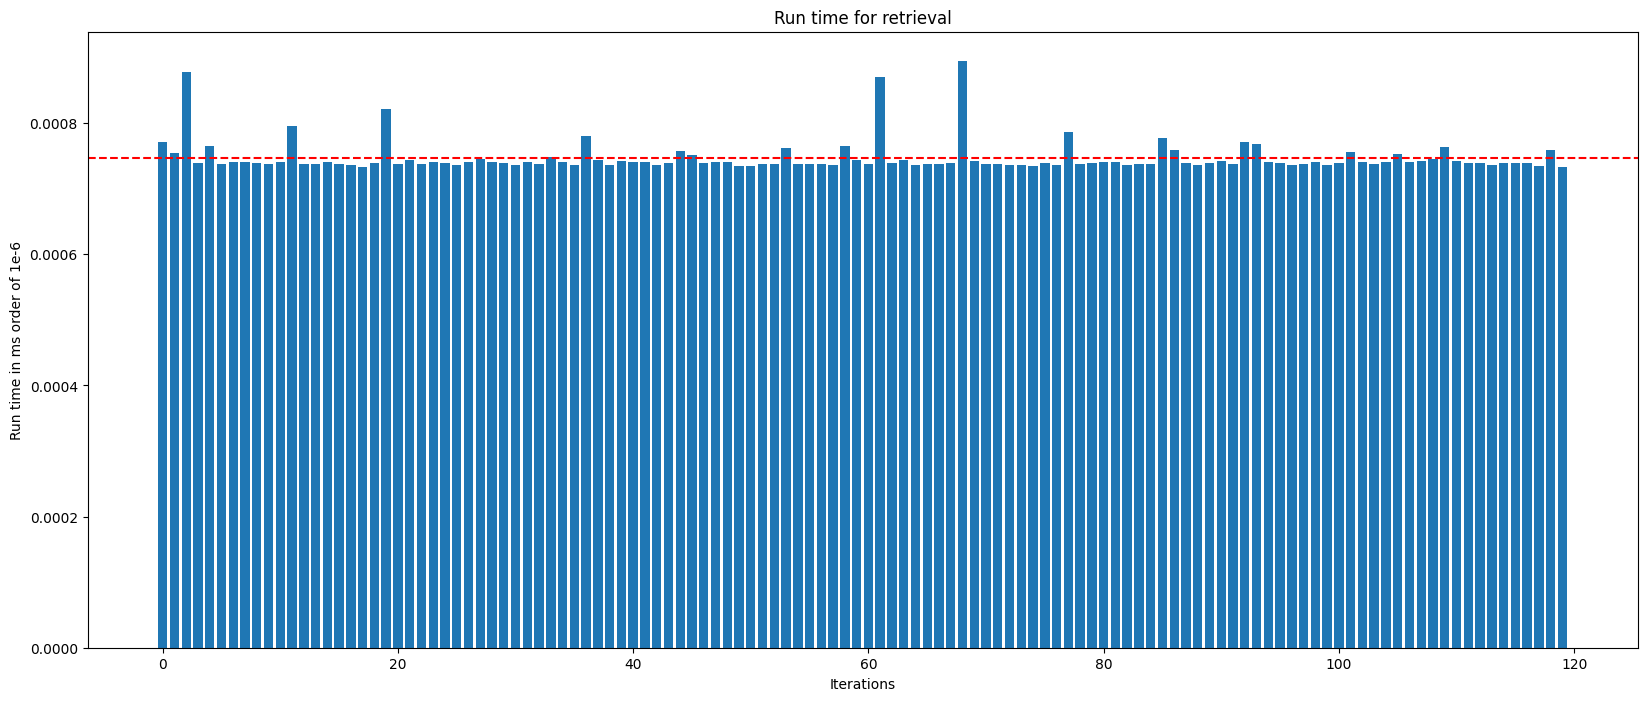

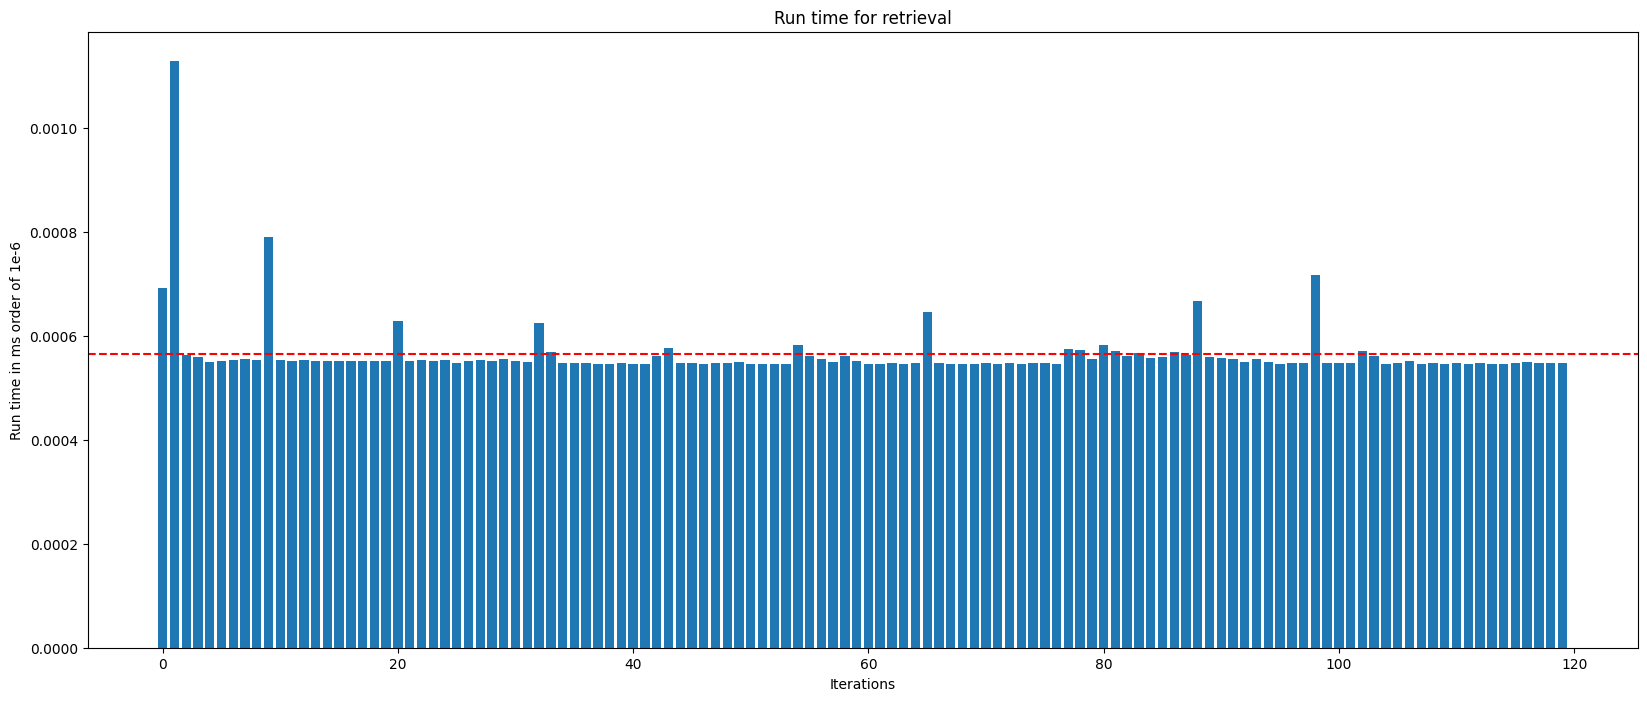

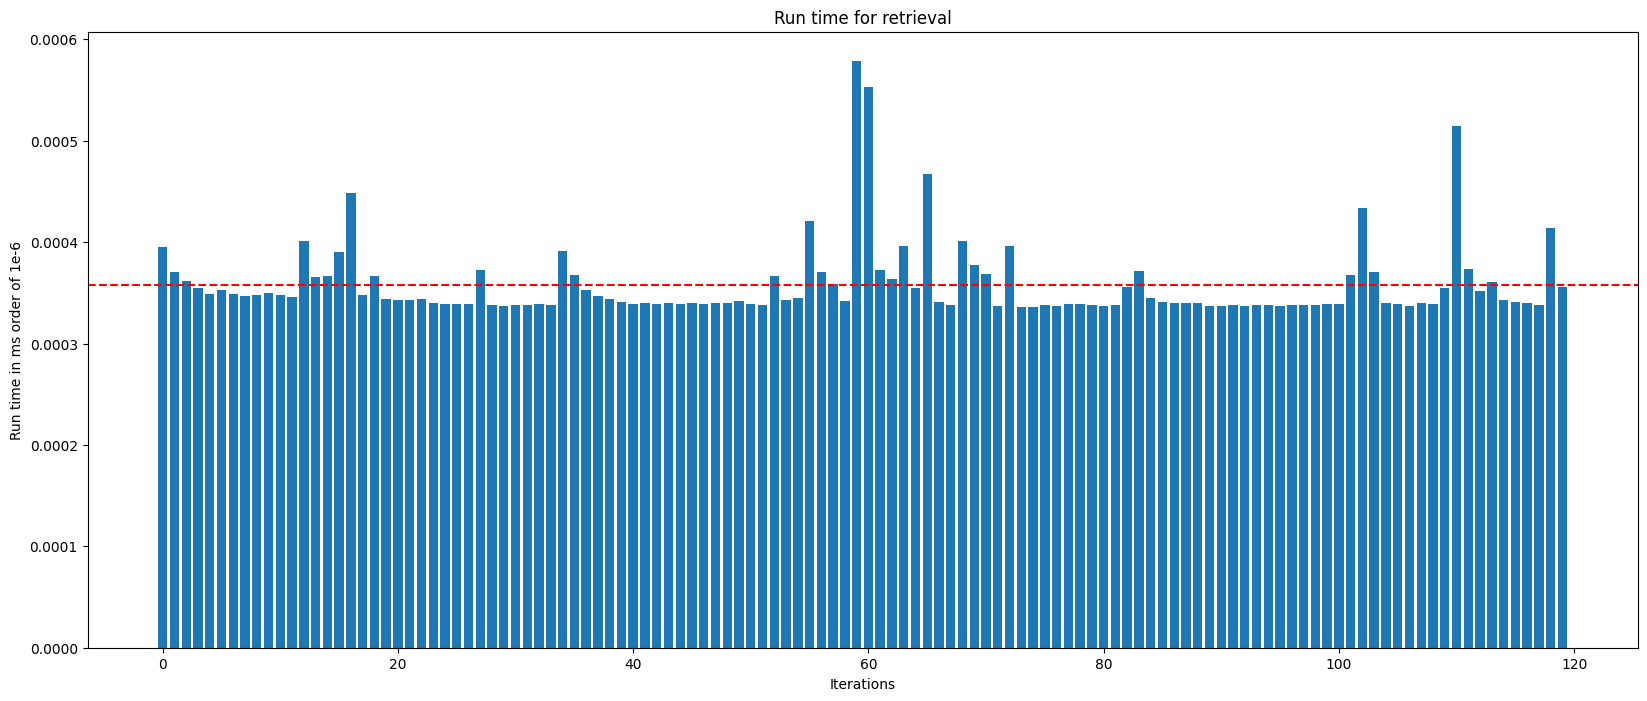

Mean time for heapsort: 0.0007471600508627792
Mean time for mergeSort: 0.0005644174118060619
Mean time for quickSort: 0.00035818614802944165


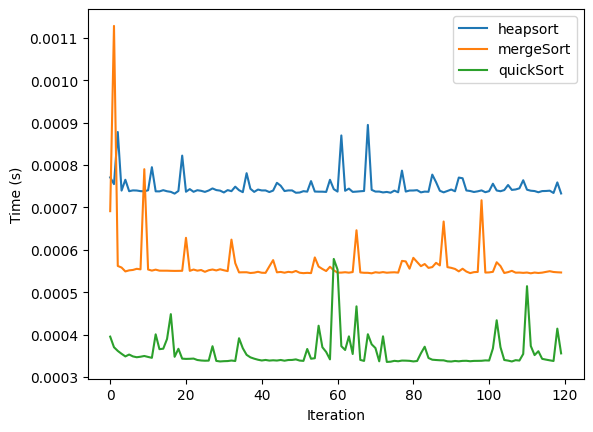

In [251]:
import gc
import statistics

gc.disable()



### Heapsort experiment code goes here

n = 120 #number of trials
run_timesHeap = []

for _ in range(n):
    randomListHeap = global_random_list.copy()
    startHeap = timeit.default_timer()
    heapSorted = heapsort(randomListHeap)
    stopHeap = timeit.default_timer()
    run_timesHeap.append(stopHeap-startHeap)

# for item in heapSorted:
#     print(item)
draw_plot(run_timesHeap)




#Merge sort experiment code goes here

n = 120 #number of trials
run_timesMerge = []
for _ in range(n):
    randomListMerge = global_random_list.copy()
    startk = timeit.default_timer()
    mergeSorted = mergeSort(randomListMerge)
    stopk = timeit.default_timer()
    run_timesMerge.append(stopk-startk)

# for item in mergeSorted:
#     print(item)
draw_plot(run_timesMerge)




# Quick sort experiment code goes here

n = 120 #number of trials
run_timesQuick = []
for _ in range(n):
    randomListQuick = global_random_list.copy()
    start = timeit.default_timer()
    quickSorted = quickSort(randomListQuick)
    stop = timeit.default_timer()
    run_timesQuick.append(stop-start)

# for item in global_random_list:
#     print(item)
draw_plot(run_timesQuick)

# #Comparing sort times
def plot_sorting_times(times_dict):
    # Plot the results
    for sort, times in times_dict.items():
        plt.plot(times, label=sort)
        mean_time = statistics.mean(times)
        print(f'Mean time for {sort}: {mean_time}')

    plt.xlabel('Iteration')
    plt.ylabel('Time (s)')
    plt.legend()
    plt.show()

# Usage:
times_dict = {
    'heapsort': run_timesHeap,
    'mergeSort': run_timesMerge,
    'quickSort': run_timesQuick
}
plot_sorting_times(times_dict)

gc.enable()

In this section, provide a detailed outline of:
- The experiments you ran, length values of the list you chose, number of runs, etc.
- The plots showing the run times corresponding to each algorithm.
- A brief discussion and conclusion regarding the results. A few sentences are fine here.

We've ran 3 experiments, one for each of the sorting algorithms. Each sorting algorithm is given the same list of length 5000 with a max value of 6000. Each experiment uses a copy of this list to ensure that the original list is unedited. Using the same list ensures consistency between each iteration across the experiments.

After running each experiment we also plotted the time each experiment took on a graph, according to the graph above it is clear that quick sort is the fastest of all the algorithms with a mean time of 0.00500s. In second place is merge sort which has a mean time of 0.00654s and in third place is heapsort with a mean time of 0.00952s.

As you can see in the graph above there is some inconsistency with the times across different iterations of the experiment (some high peaks at seemingly random intervals). We have tried limiting these effects through means such as disabling Python's garbage collector for the duration of the experiment. Unfortunately this problem seems to be unavoidable, we think it is most likely caused by the load placed on my system.

### PART E

E1. In previous experiments you also saw that not all algorithms are suitable for all scenarios. For instance, Merge Sort is better than Quick sort for certain situations. In this section, design a experiment to compare the scenarios where Merge Sort is better/worse than Quick Sort. You can use the traditional version of Merge Sort or use improved version ( maybe via recursion) to compare this performance.

In [252]:
### Bar chart plot function

# def draw_bar_plot(run_arr, labels, sortTitle):
#     x = np.arange(len(run_arr[0]))  # Assuming all arrays have the same length
#     fig = plt.figure(figsize=(20, 8))
    
#     for i, data in enumerate(run_arr):
#         plt.bar(x + i * 0.2, data, width=0.3, label=labels[i])

#     plt.axhline(np.mean(run_arr[0]), color="red", linestyle="--", label="MergeSort")
#     plt.axhline(np.mean(run_arr[1]), color="blue", linestyle="--", label="Quicksort")

#     plt.xlabel("Iterations")
#     plt.ylabel("Run time in ms order of 1e-6")
#     plt.title("Run time for "+sortTitle+" Sort")
#     plt.legend()
#     plt.show()

def draw_bar_plot(run_arr, labels, sortTitle):
    x = np.arange(len(run_arr[0]))  # Assuming all arrays have the same length
    fig = plt.figure(figsize=(20, 8))

    for i, data in enumerate(run_arr):
        plt.bar(x + i * 0.2, data, width=0.3, label=labels[i])

    avg_line_colors = ['red', 'blue', 'green']  # Add more colors if needed
    for i in range(len(run_arr)):
        plt.axhline(np.mean(run_arr[i]), color=avg_line_colors[i], linestyle="--", label=f"Avg {labels[i]}")

    plt.xlabel("Iterations")
    plt.ylabel("Run time in ms order of 1e-6")
    plt.title(f"Run time for {sortTitle} Sort")
    plt.legend()
    plt.show()


  0%|          | 0/120 [00:00<?, ?it/s]

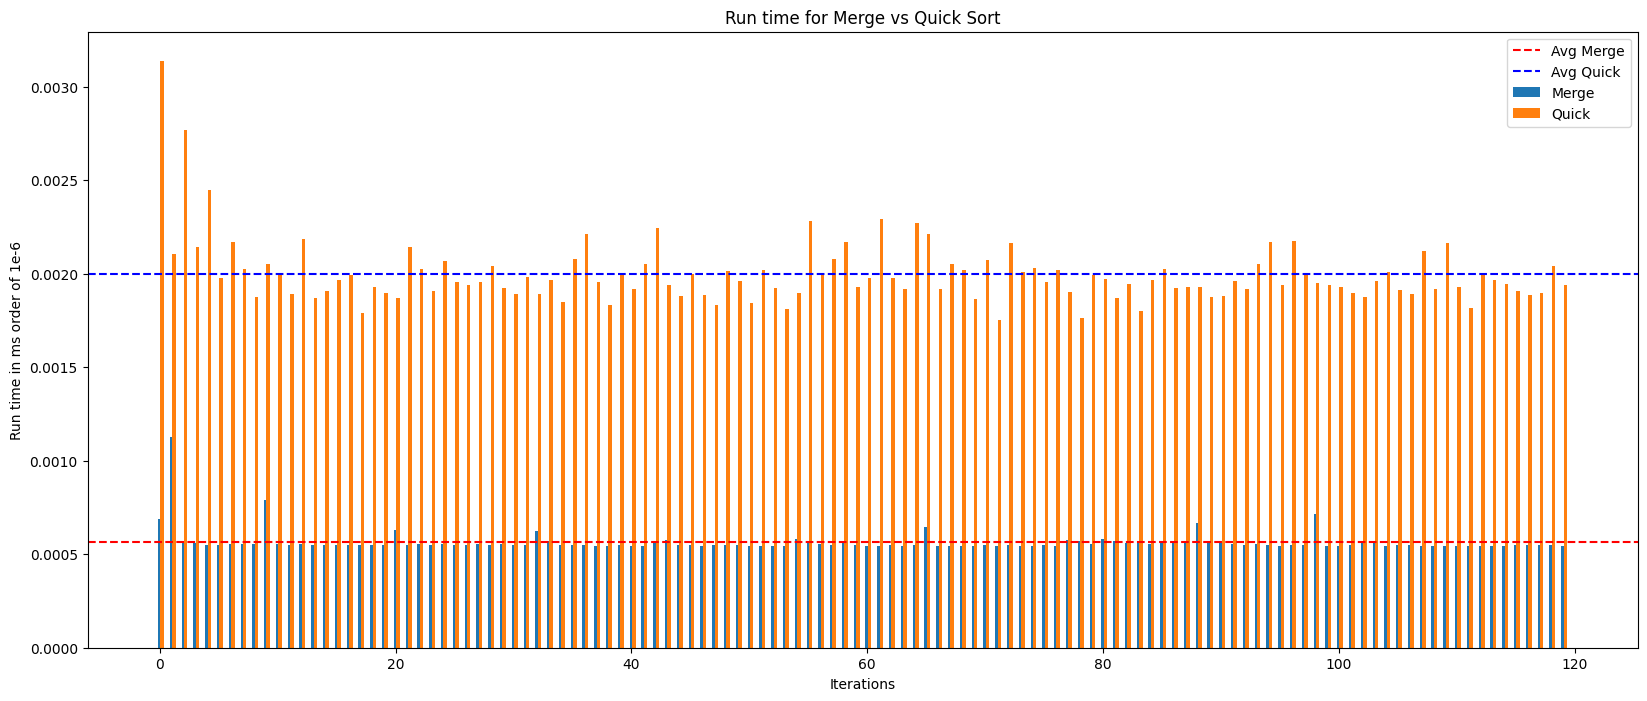

  0%|          | 0/120 [00:00<?, ?it/s]

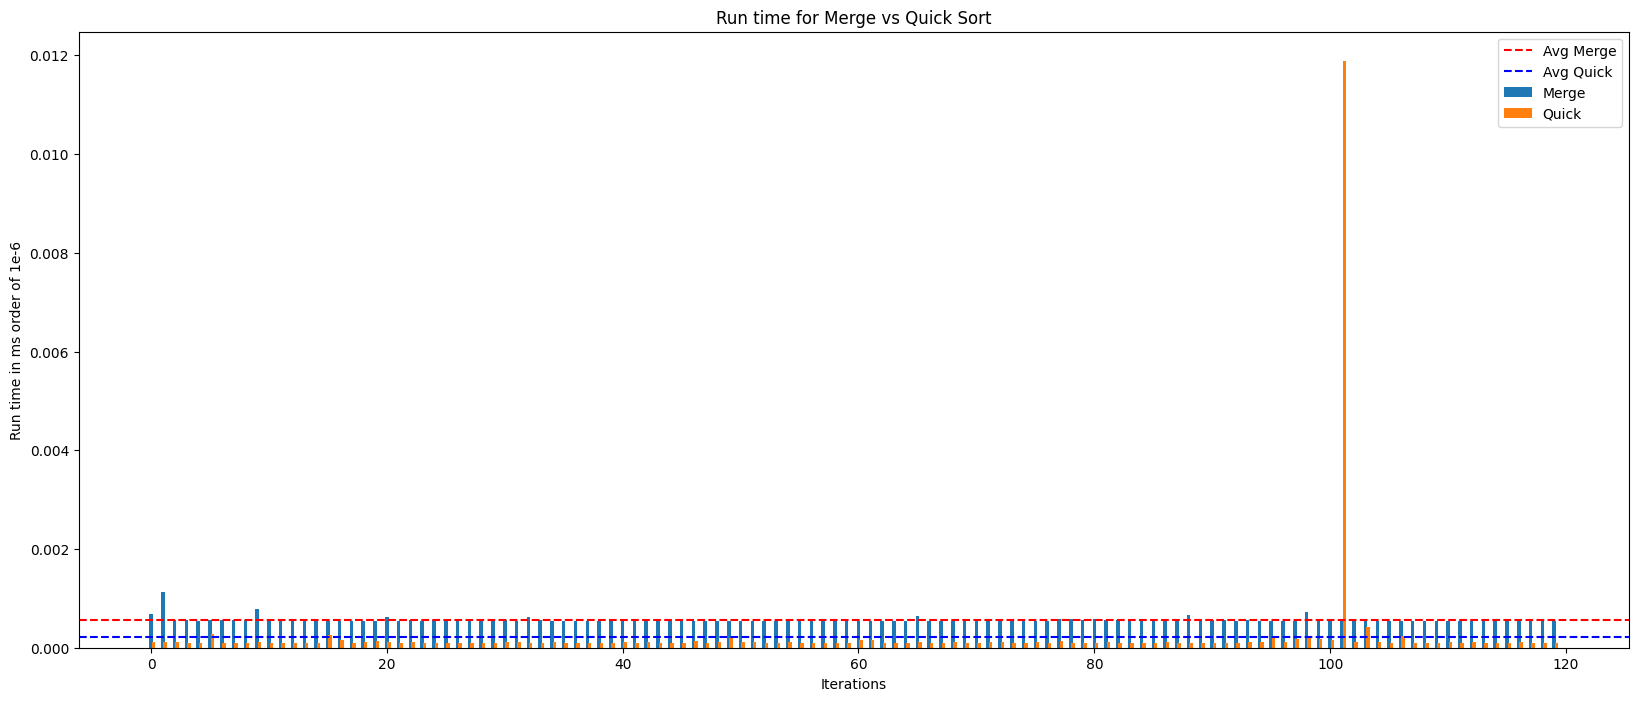

In [253]:
# your implementation and experiments go here.

n = 120
runtimesMerge = []
runtimesQuick = []


for _ in tqdm_notebook(range(n)):

    Erandomlist = create_custom_list(300,300)

    Emerge = mergeSort(list(Erandomlist))
    Estart1 = timeit.default_timer()
    Emerge = mergeSort(Erandomlist)
    Estop1 = timeit.default_timer()
    runtimesMerge.append(Estop1 - Estart1)

    Equick = quickSort(list(Erandomlist))
    Estart2 = timeit.default_timer()
    Equick = quickSort(Erandomlist)
    Estop2 = timeit.default_timer()
    runtimesQuick.append(Estop2 - Estart2)

draw_bar_plot([run_timesMerge, runtimesQuick], ['Merge', 'Quick'], "Merge vs Quick")

runtimesMerge = []
runtimesQuick = []
for _ in tqdm_notebook(range(n)):

    Erandomlist = create_custom_list(50,300)

    Emerge = mergeSort(list(Erandomlist))
    Estart1 = timeit.default_timer()
    Emerge = mergeSort(Erandomlist)
    Estop1 = timeit.default_timer()
    runtimesMerge.append(Estop1 - Estart1)

    Equick = quickSort(list(Erandomlist))
    Estart2 = timeit.default_timer()
    Equick = quickSort(Erandomlist)
    Estop2 = timeit.default_timer()
    runtimesQuick.append(Estop2 - Estart2)

draw_bar_plot([run_timesMerge, runtimesQuick], ['Merge', 'Quick'], "Merge vs Quick")

In this section, provide a detailed outline of:
- The experiments you ran, length values of the list you chose, number of runs, etc.
- The plots showing the run times corresponding to each algorithm.
- A brief discussion and conclusion regarding the results. A few sentences are fine here.


Experiments ran: 

Quicksort vs MergeSort with list of length 300

Quicksort performed nearly 4x as slow as merge sort when dealing with long list lengths (n=300).
The significantly slower performance of Quicksort compared to Merge Sort on long lists can be attributed to its dependence on pivot selection and partitioning, leading to potential worst-case scenarios where the algorithm exhibits higher time complexity. In contrast, Merge Sort's consistent and efficient divide-and-conquer strategy contributes to more stable performance across various input distributions, especially advantageous for longer lists.

Quicksort vs MergeSort with list of length 50

Mergesort performed around 5x as slow as quicksort when dealing with short list lengths (n=30).
Mergesort tends to have a higher time complexity for small list lengths due to its recursive nature and additional space requirements, resulting in slower performance compared to the more efficient partitioning strategy of Quicksort, especially for small datasets like n=30. As the list length increases, Mergesort's advantages in handling larger datasets and guaranteed O(n log n) time complexity may become more apparent.



E2. Recall that on the first day of class I asked which two algorithms have similar complexity - Merge Sort and Quick Sort under (O(nlogn)) are likely to perform similar under average cases. However, under worst case, the complexity of quick sort is much worse (O(n^2). Design an experiment to show this behavior. Plot this behavior on a bar/line chart. 

Next, count the number of "swaps" after which Quick sort starts behaving comparable to Merge sort. 

HINT: This will be a threshold at which the quick sort algorithm picks up again.


In [254]:
# ## your implementation and code goes here

# n = 120
# E2runtimesQuick = []
# E2runtimesQuick2 = []
# E2runtimesMerge = []

# for _ in tqdm_notebook(range(n)):
    
#     E2randList = create_custom_list(300,300)
#     E2randList.sort() #quicksort has worst case complexity on sorted lists.

#     E2sortedList1 = quickSort(E2randList)
#     E2start1 = timeit.default_timer()
#     E2sortedList1 = quickSort(E2randList)
#     E2stop1 = timeit.default_timer()
#     if ((_ % 3) == 0):
#         E2runtimesQuick.append(E2stop1 - E2start1)

# # draw_plot(E2runtimesQuick)

# for _ in tqdm_notebook(range(n)):
    
#     E2randList = create_custom_list(300,300)
#     # E2randList.sort() #quicksort has worst case complexity on sorted lists.

#     E2sortedList2 = quickSort(E2randList)
#     E2start2 = timeit.default_timer()
#     E2sortedList2 = quickSort(E2randList)
#     E2stop2 = timeit.default_timer()
#     if (_ % 3 == 0):
#         E2runtimesQuick2.append(E2stop2 - E2start2)

# for _ in tqdm_notebook(range(n)):
    
#     E2randList = create_custom_list(300,300)
#     # E2randList.sort() #quicksort has worst case complexity on sorted lists.

#     E2sortedList3 = mergeSort(E2randList)
#     E2start3 = timeit.default_timer()
#     E2sortedList3 = mergeSort(E2randList)
#     E2stop3 = timeit.default_timer()
#     if (_ % 3 == 0):
#         E2runtimesMerge.append(E2stop3 - E2start3)
# draw_bar_plot([E2runtimesQuick,E2runtimesQuick2, E2runtimesMerge], ['Quicksort Worst', 'Quicksort Average', 'Mergesort Average'], "Quicksort")

In [255]:
#copy and edit quicksort to count the number of swaps in the pivot section
def quicksortCountSwaps(arr):
    if len(arr) <= 1:
        return arr, 0
    else:
        pivot = arr[0]
        items_greater = [item for item in arr[1:] if item > pivot]
        items_lower = [item for item in arr[1:] if item <= pivot]

        sorted_lower, lower_swaps = quicksortCountSwaps(items_lower)
        sorted_greater, greater_swaps = quicksortCountSwaps(items_greater)

        # Count the number of swaps in the pivot section
        pivot_swaps = len(items_greater) + len(items_lower) # Count both items_greater and items_lower

        return sorted_lower + [pivot] + sorted_greater, lower_swaps + greater_swaps + pivot_swaps

  0%|          | 0/3 [00:00<?, ?it/s]

Average quicksort times:  4.638183357504507e-06
Average mergesort times:  5.513937988628944e-06
The average times of quicksort and mergesort are close.
Average quicksort swaps:  24.883333333333333


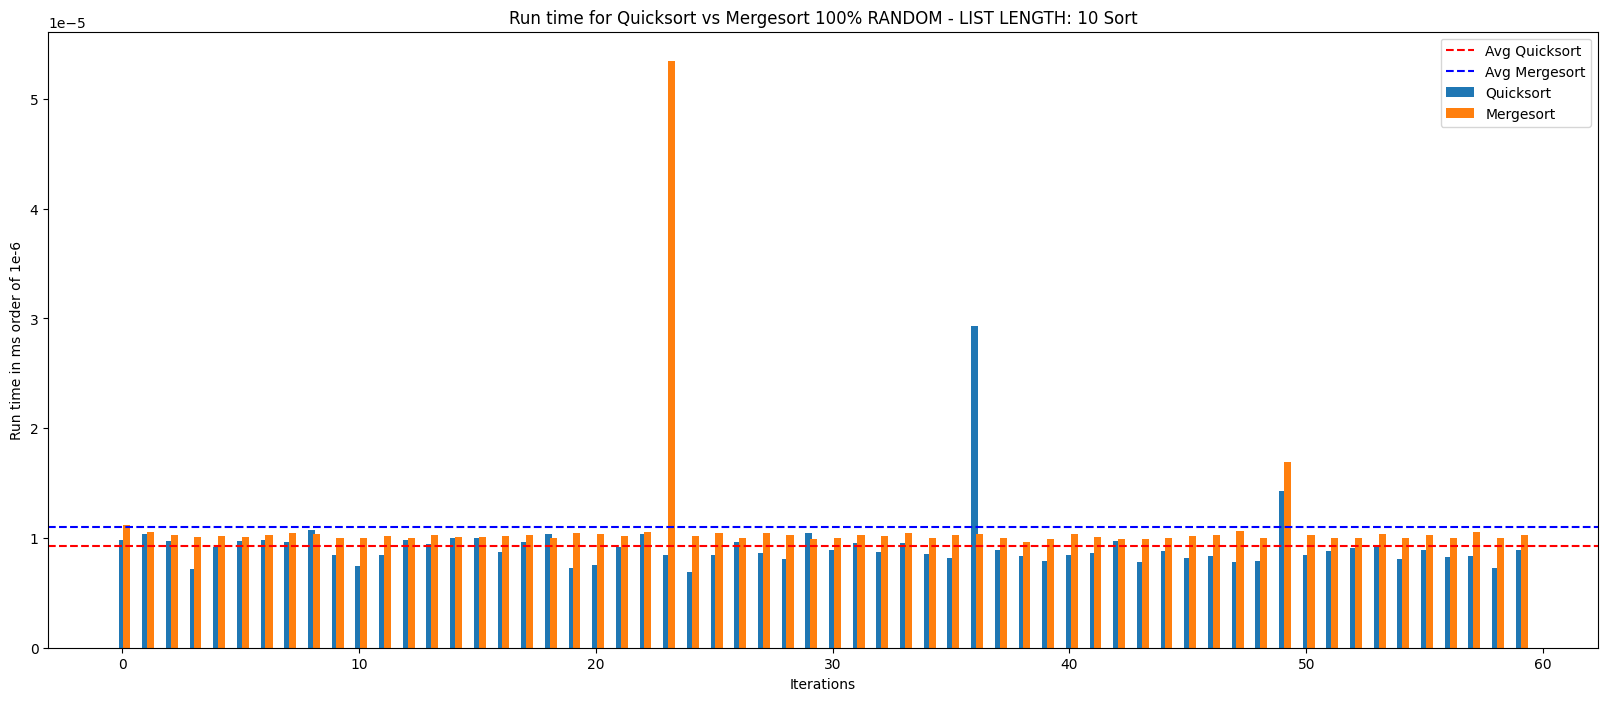

Average quicksort times:  4.968425491824746e-06
Average mergesort times:  4.851731743353109e-06
The average times of quicksort and mergesort are close.
Average quicksort swaps:  34.45


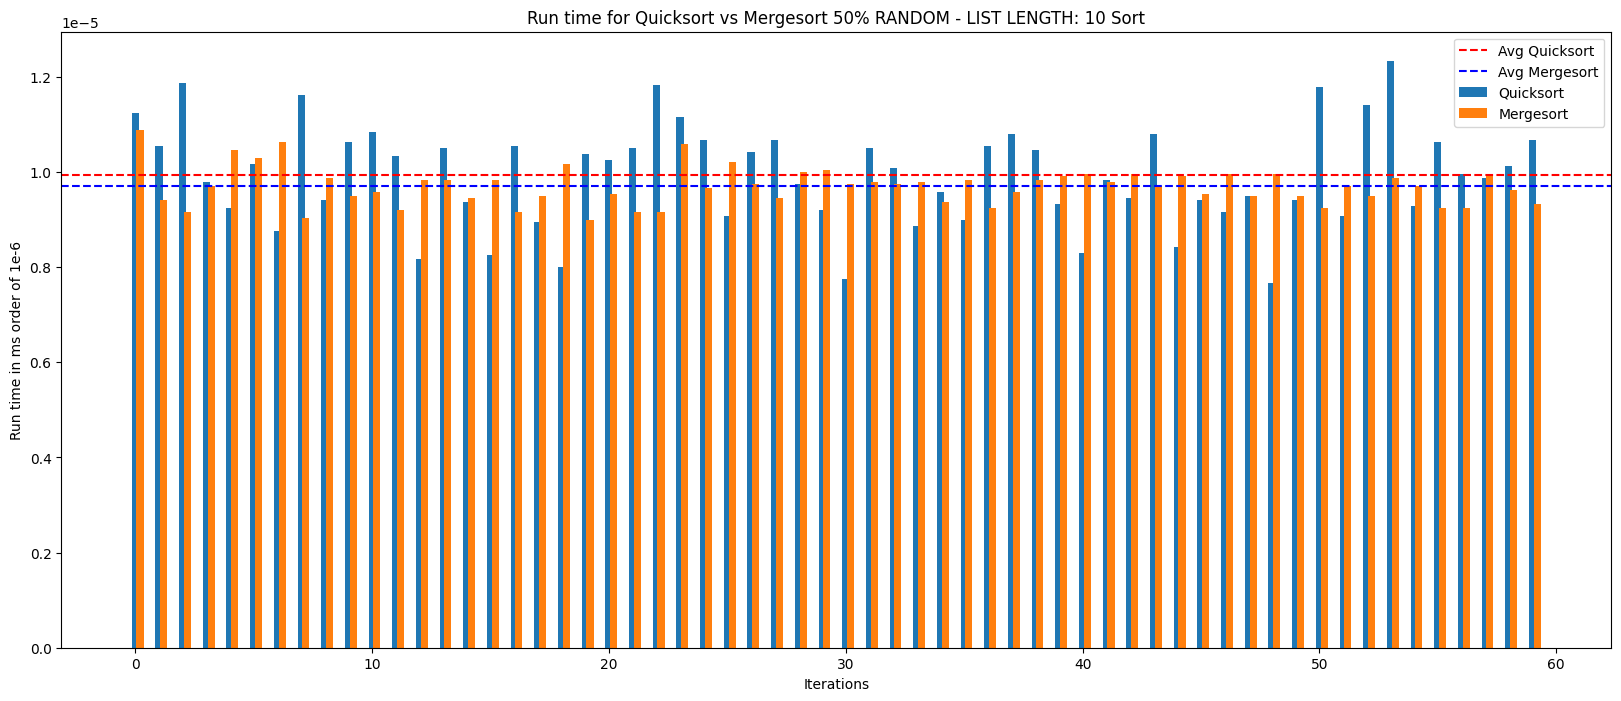

Average quicksort times:  5.733359527463714e-06
Average mergesort times:  4.620844265446067e-06
The average times of quicksort and mergesort are close.
Average quicksort swaps:  45.0


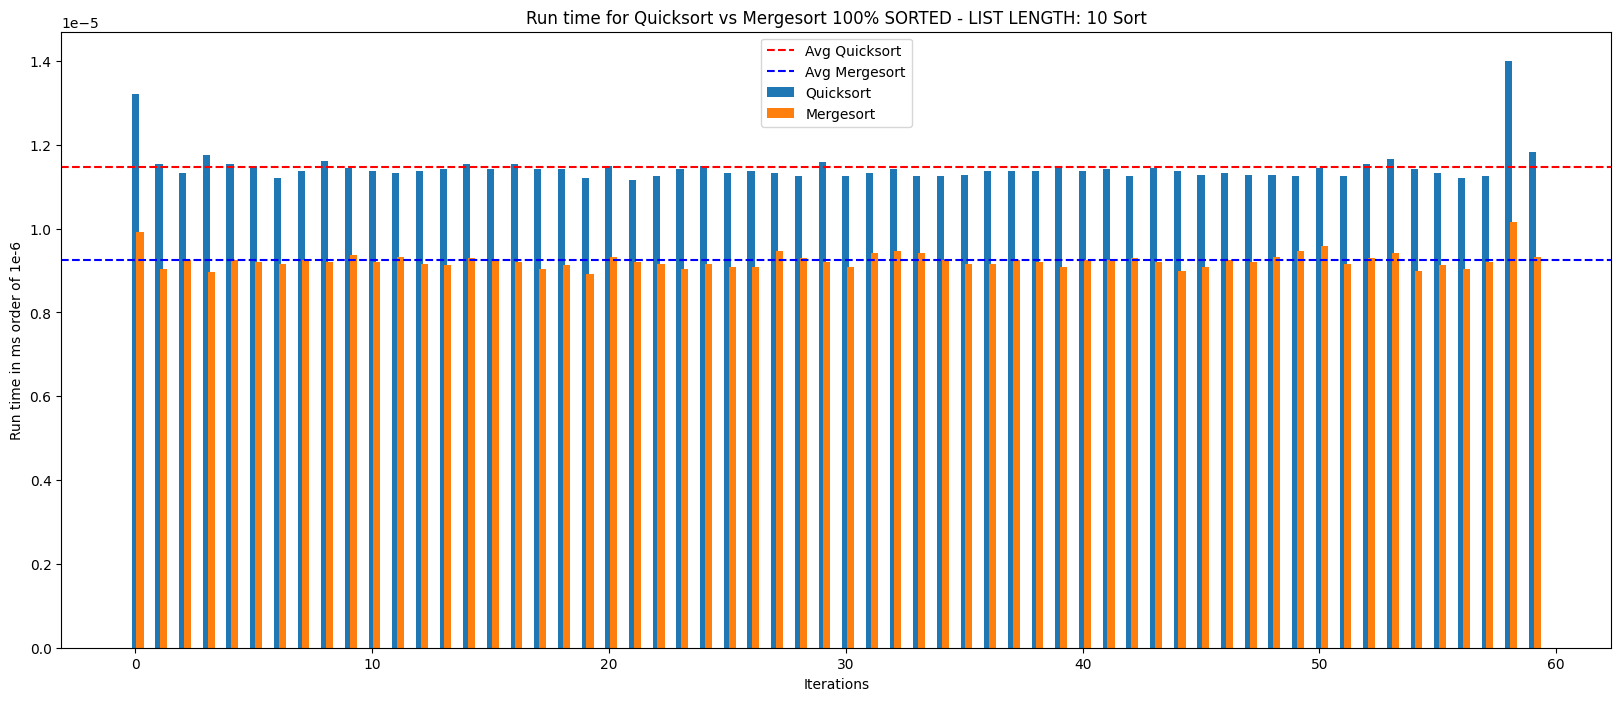

Average quicksort times:  7.54309012942637e-05
Average mergesort times:  9.118923626374453e-05
The average times of quicksort and mergesort are not close.


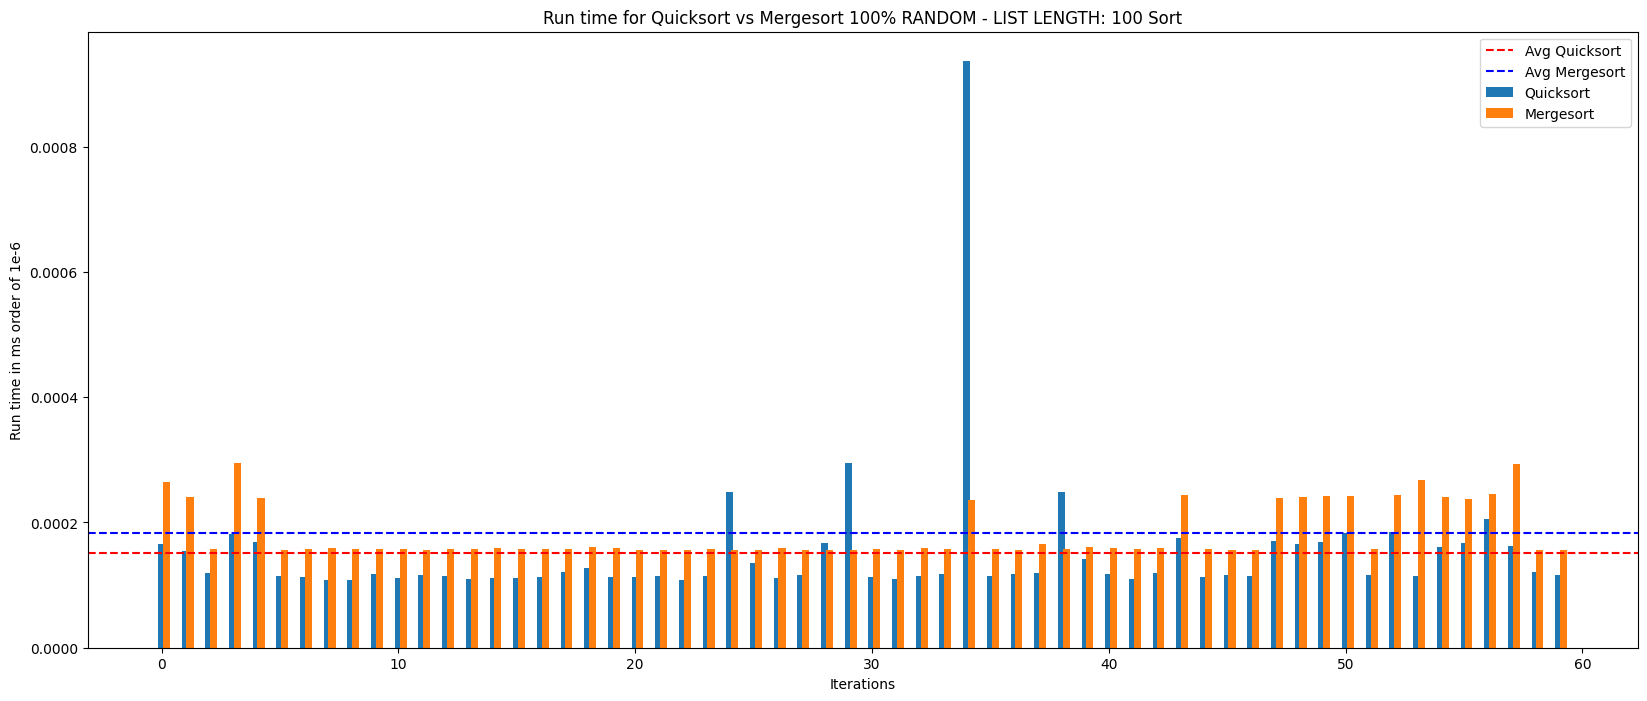

Average quicksort times:  0.0001225163364627709
Average mergesort times:  7.298408211984982e-05
The average times of quicksort and mergesort are not close.


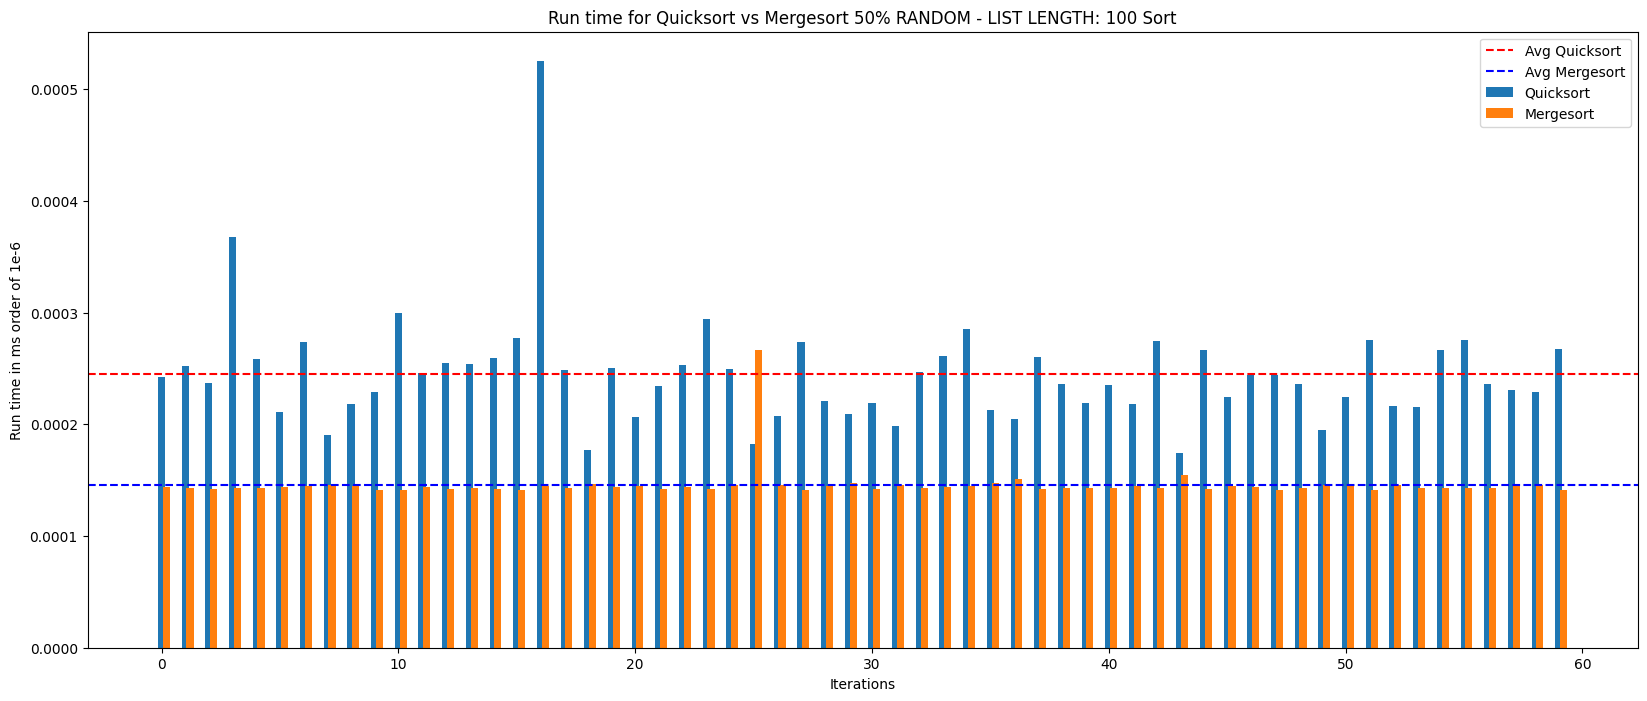

Average quicksort times:  0.00019957742382151384
Average mergesort times:  6.952951177178572e-05
The average times of quicksort and mergesort are not close.


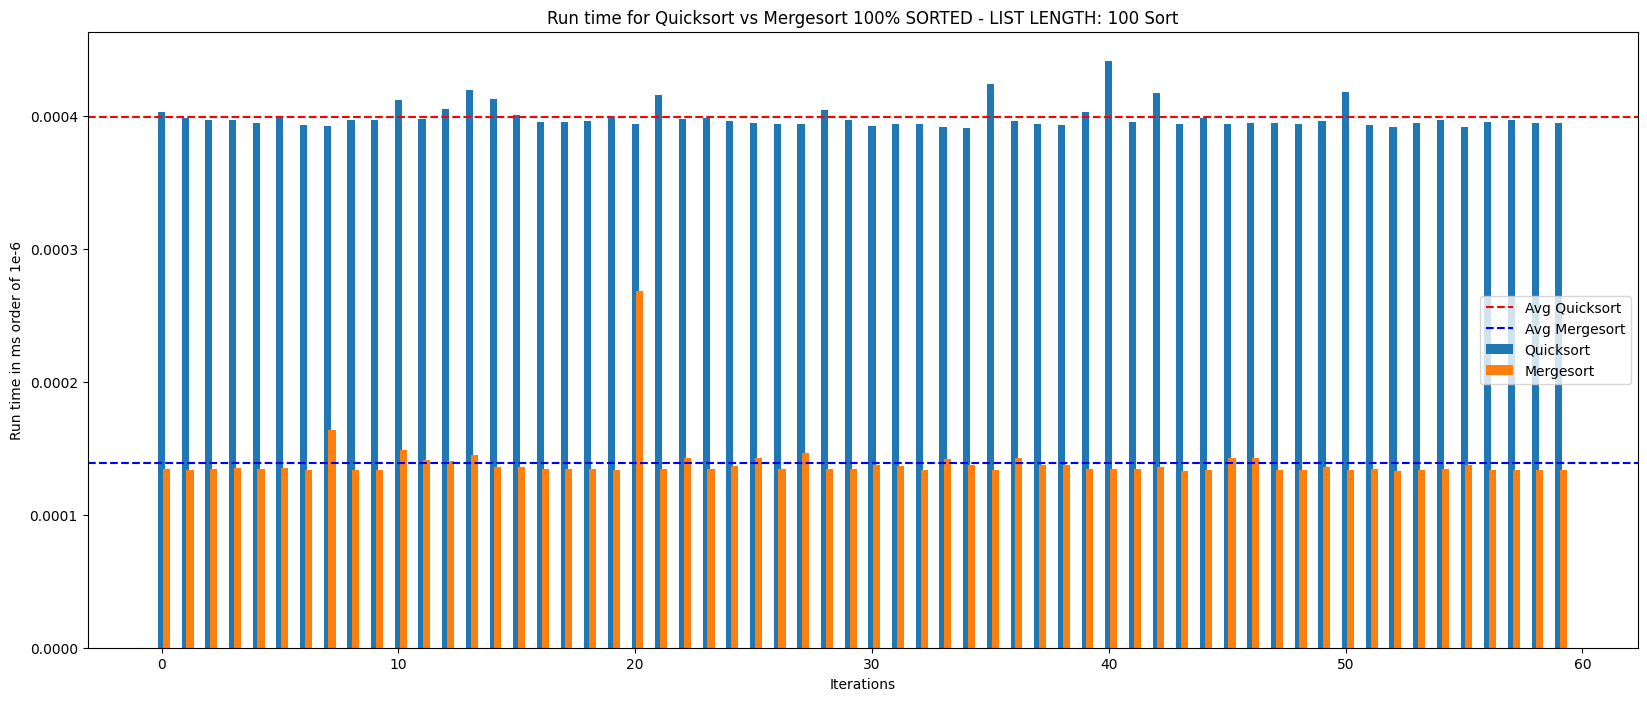

Average quicksort times:  0.0007550267027302955
Average mergesort times:  0.0010922916427565119
The average times of quicksort and mergesort are not close.


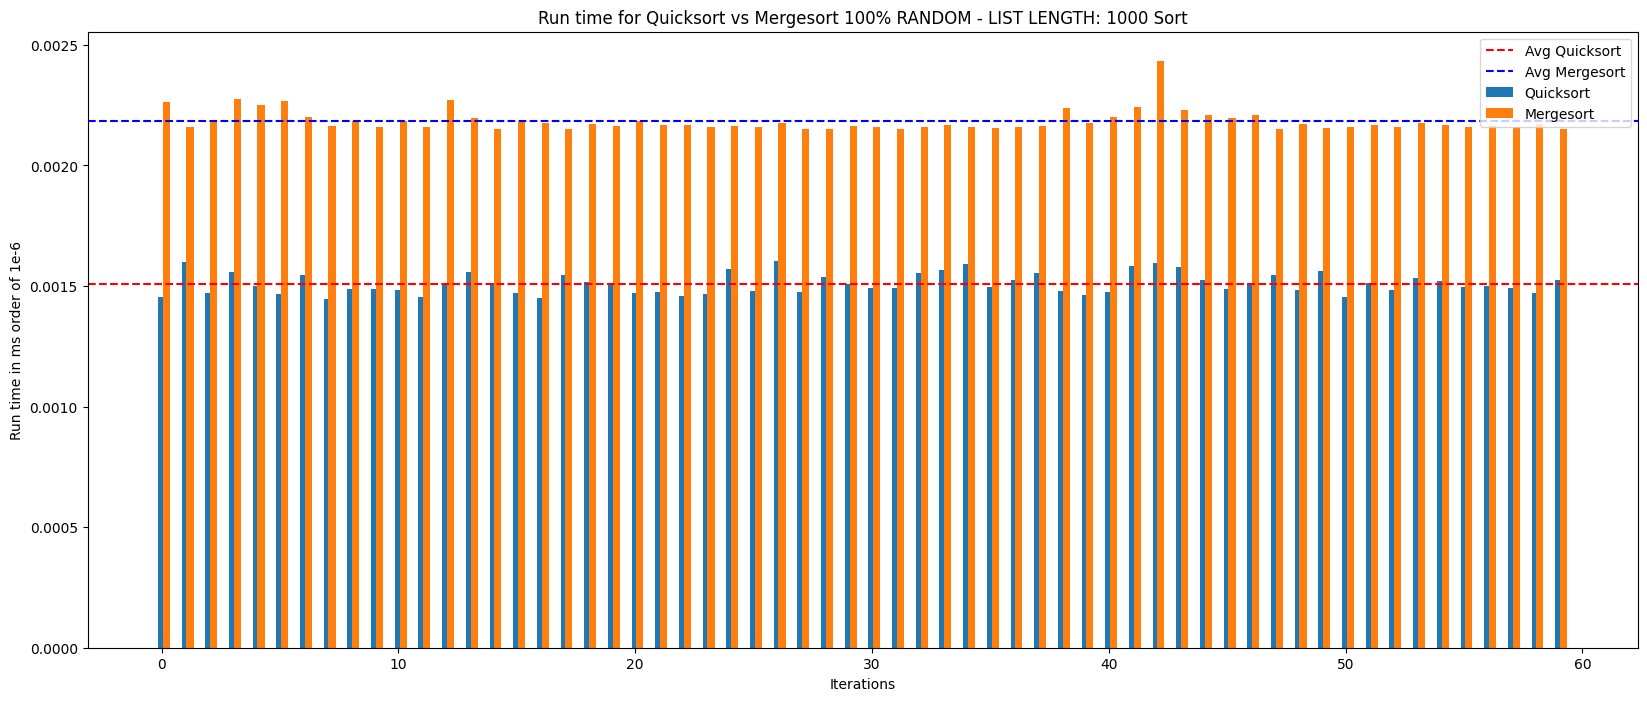

Average quicksort times:  0.005300811776154054
Average mergesort times:  0.0009783663515311976
The average times of quicksort and mergesort are not close.


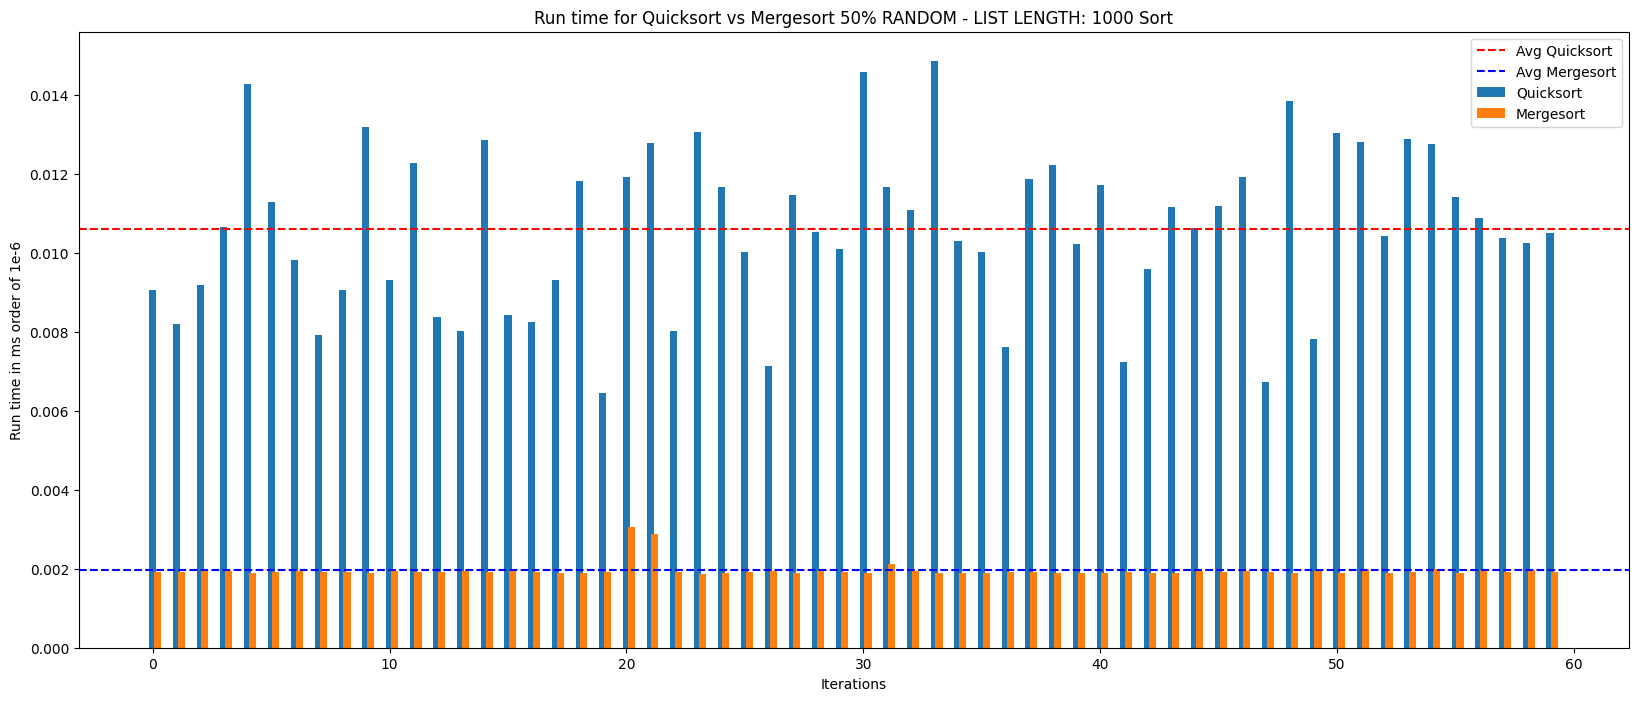

Average quicksort times:  0.0158403718698537
Average mergesort times:  0.0009031267244912063
The average times of quicksort and mergesort are not close.


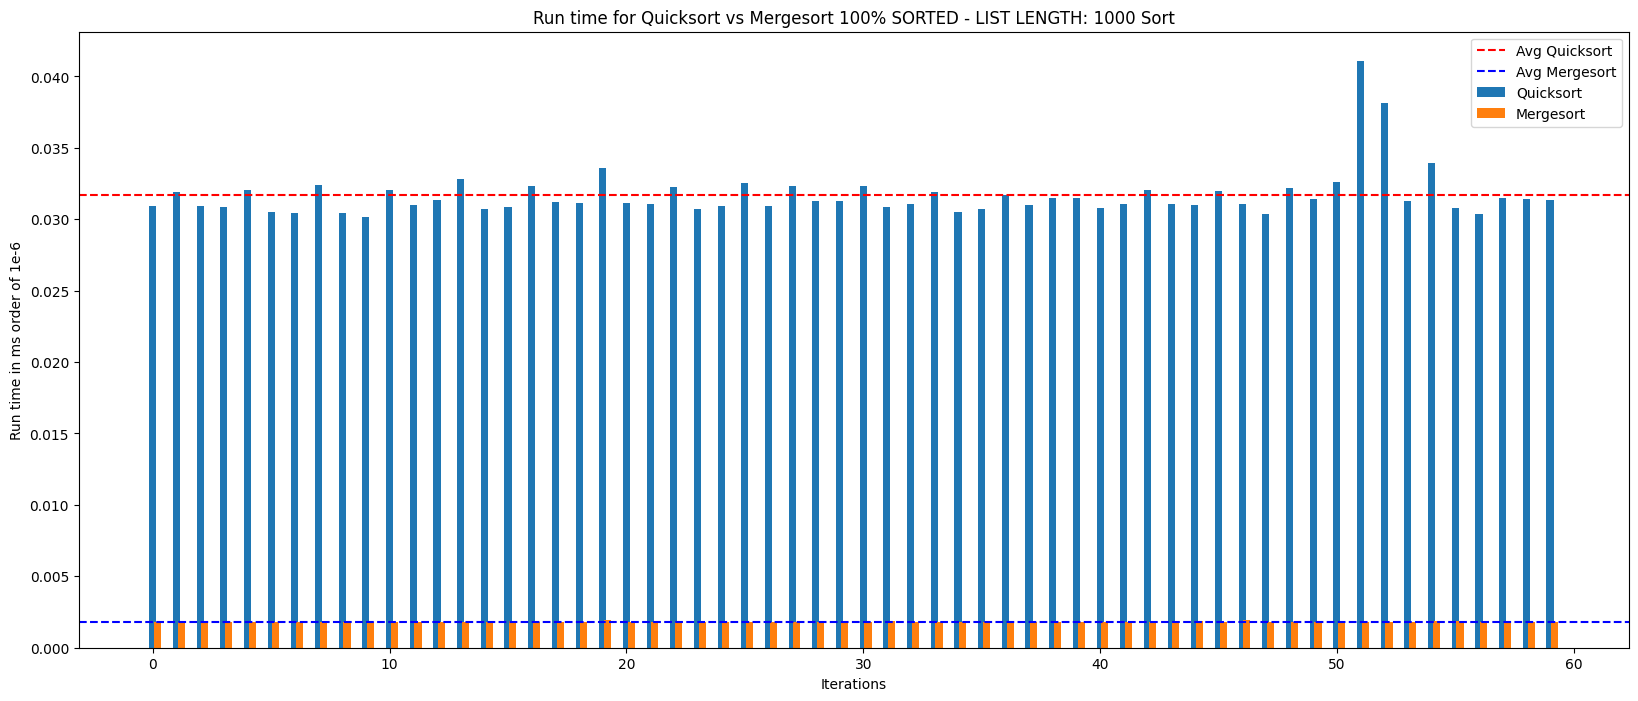

In [256]:
#compare quicksort to mergesort with different types of lists. 
#100% random, 50% sorted, 100% sorted

n = 120

for i in tqdm_notebook(range(3)):

    #100% random
    unsortedquicksortrunTimes = []
    unsortedquicksortSwaps = []
    unsortedmergesortrunTimes = []

    for _ in (range(n)):
        
        # for i in range(5):
            E3randList = create_custom_list((10**(i + 1)),3000) #generate lists of that go from near sorted to completely unsorted.
            E3sortedList1, E3swaps = quicksortCountSwaps(E3randList.copy())
            E3start1 = timeit.default_timer()
            E3sortedList1, E3swaps = quicksortCountSwaps(E3randList.copy())
            E3stop1 = timeit.default_timer()
            if ((_ % 2) == 0):
                unsortedquicksortrunTimes.append(E3stop1 - E3start1)
            unsortedquicksortSwaps.append(E3swaps)
            E3sortedList2 = mergeSort(E3randList.copy())
            E3start2 = timeit.default_timer()
            E3sortedList2 = mergeSort(E3randList.copy())
            E3stop2 = timeit.default_timer()
            if (_ % 2 == 0):
                unsortedmergesortrunTimes.append(E3stop2 - E3start2)

    average_quicksort_times = sum(unsortedquicksortrunTimes) / n
    average_mergesort_times = sum(unsortedmergesortrunTimes) / n
    print("Average quicksort times: ", average_quicksort_times)
    print("Average mergesort times: ", average_mergesort_times)
    if abs(average_quicksort_times - average_mergesort_times) < 0.00001:
        print("The average times of quicksort and mergesort are close.")
        
        print("Average quicksort swaps: ", sum(unsortedquicksortSwaps) / n)
    else:
        print("The average times of quicksort and mergesort are not close.")
    draw_bar_plot([unsortedquicksortrunTimes,unsortedmergesortrunTimes], ['Quicksort', 'Mergesort'], "Quicksort vs Mergesort 100% RANDOM - LIST LENGTH: " + str(10**(i + 1)))

    #50% sorted
    halfsortedquicksortTimes = []
    halfsortedquicksortSwaps = []
    halfsortedMergeSortTimes = []

    for _ in (range(n)):
        
        # for i in range(5):
        E3halfSortedList = generate_near_sorted_list((10**(i + 1)),0.5) #0.5 is the percentage of shuffle applied to the list.
        E3sortedList3, E3swaps1 = quicksortCountSwaps(E3halfSortedList.copy())
        E3start3 = timeit.default_timer()
        E3sortedList3, E3swaps1 = quicksortCountSwaps(E3halfSortedList.copy())
        E3stop3 = timeit.default_timer()
        if ((_ % 2) == 0):
            halfsortedquicksortTimes.append(E3stop3 - E3start3)
        halfsortedquicksortSwaps.append(E3swaps1)
        E3sortedList4 = mergeSort(E3halfSortedList.copy())
        E3start4 = timeit.default_timer()
        E3sortedList4 = mergeSort(E3halfSortedList.copy())
        E3stop4 = timeit.default_timer()
        if (_ % 2 == 0):
            halfsortedMergeSortTimes.append(E3stop4 - E3start4)

    average_quicksort_times = sum(halfsortedquicksortTimes) / n
    average_mergesort_times = sum(halfsortedMergeSortTimes) / n
    print("Average quicksort times: ", average_quicksort_times)
    print("Average mergesort times: ", average_mergesort_times)
    if abs(average_quicksort_times - average_mergesort_times) < 0.00001:
        print("The average times of quicksort and mergesort are close.")
        
        print("Average quicksort swaps: ", sum(halfsortedquicksortSwaps) / n)
    else:
        print("The average times of quicksort and mergesort are not close.")
    draw_bar_plot([halfsortedquicksortTimes,halfsortedMergeSortTimes], ['Quicksort', 'Mergesort'], "Quicksort vs Mergesort 50% RANDOM - LIST LENGTH: " + str(10**(i + 1)))


    #100% sorted
    fullsortedquicksortTimes = []
    fullsortedquicksortSwaps = []
    fullsortedMergeSortTimes = []

    for _ in (range(n)):
        
        # for i in range(5):
        E3fullSortedList = generate_near_sorted_list((10**(i + 1)), 0) # 0% is the percentage of shuffle applied to the list.
        E3sortedList5, E3swaps2 = quicksortCountSwaps(E3fullSortedList.copy())
        E3start5 = timeit.default_timer()
        E3sortedList5, E3swaps2 = quicksortCountSwaps(E3fullSortedList.copy())
        E3stop5 = timeit.default_timer()
        if ((_ % 2) == 0):
            fullsortedquicksortTimes.append(E3stop5 - E3start5)
        fullsortedquicksortSwaps.append(E3swaps2)
        E3sortedList6 = mergeSort(E3fullSortedList.copy())
        E3start6 = timeit.default_timer()
        E3sortedList6 = mergeSort(E3fullSortedList.copy())
        E3stop6 = timeit.default_timer()
        if (_ % 2 == 0):
            fullsortedMergeSortTimes.append(E3stop6 - E3start6)

    average_quicksort_times = sum(fullsortedquicksortTimes) / n
    average_mergesort_times = sum(fullsortedMergeSortTimes) / n
    print("Average quicksort times: ", average_quicksort_times)
    print("Average mergesort times: ", average_mergesort_times)
    if abs(average_quicksort_times - average_mergesort_times) < 0.00001:
        print("The average times of quicksort and mergesort are close.")
        print("Average quicksort swaps: ", sum(fullsortedquicksortSwaps) / n)
    else:
        print("The average times of quicksort and mergesort are not close.")
    draw_bar_plot([fullsortedquicksortTimes,fullsortedMergeSortTimes], ['Quicksort', 'Mergesort'], "Quicksort vs Mergesort 100% SORTED - LIST LENGTH: " + str(10**(i + 1)))


In this section, provide a detailed outline of:
- The experiments you ran and the rationale behind your worst case scenario.
- The plots showing the run times.

Further explain how you computed the swaps and verify that you calculation is correct, by applying it on a diifferent list under same experimental conditions.

**Reflection**:

In this section, we are comparing the time complexities of quicksort and mergesort under certain different conditions. The goal of this section is to estimate under what conditions, the time complexities of quicksort compared to mergesort are similar (for my approximationss, we used an epsilon of 0.00001).
To do this, we have to identify the best, average, and worst case scenarios for each sort so that we can test each sort on them. Based on previous knowledge, the best, average, and worst case scenarios for mergesort are O(nlogn). Moreover, the best and average case for quicksort is O(nlogn), wheras the worst case is O(n^2). Quicksort worst case results from when a list is mostly or already sorted. Its average case results from an around half sorted list, and its best case results from a completely random list.

I computed the swaps in a number of ways. To implement additional testing, I tested the average, best and worse case for each sorting algorithm three times each (3 * 3 = 9 bar graphs) based on length of the list. The reason for this is to get further details of the strengths and weaknesses of each graph.

The following is an outline of the above graphs.

LIST LENGTH = 10
1. Quicksort vs. Mergesort | completely random list
    The time complexity relationship between the two graphs are very similar.
2. Quicksort vs. Mergesort | 50% sorted
    The time complexity relationship between the two graphs is again similar; However, we are approaching quicksort worse case, where the list is already sorted.
3. Quicksort vs. Mergesort | 100% sorted
    The time complexity relationship between the two graphs is very different; mergesort is noticeably faster. This is because we are at quicksort worse case, where the list is already sorted. Quicksort takes O(n^2) time here. On the other hand, mergesort is O(nlogn) and near instantanious with the list length so short.

LIST LENGTH = 100
1. Quicksort vs. Mergesort | completely random list
    The time complexity relationship between the two graphs are different. Mergesort performs worse than quicksort here. This is because quicksort works best when the list is completely random, better than mergesort with longer length lists. Long lists and random lists is when quicksort performs best.
2. Quicksort vs. Mergesort | 50% sorted
    The time complexity relationship between the two graphs is very different; mergesort is noticibly faster. This is because we are approaching quicksort worse case, where the list is already sorted. Quicksort is event slower when the list length is longer.
3. Quicksort vs. Mergesort | 100% sorted
    The time complexity relationship between the two graphs is very different; mergesort is significantly faster. This is because we are at quicksort worse case, where the list is already sorted. Quicksort takes O(n^2) time here. On the other hand, mergesort is O(nlogn) and near instantanious with the list length so short.

LIST LENGTH = 1000
1. Quicksort vs. Mergesort | completely random list
    The time complexity relationship between the two graphs are different. Mergesort performs noticably worse than quicksort here. This is because quicksort works best when the list is completely random, better than mergesort with longer length lists.
2. Quicksort vs. Mergesort | 50% sorted
    The time complexity relationship between the two graphs is very different; mergesort is noticibly faster. This is because we are approaching quicksort worse case, where the list is already sorted. Quicksort is event slower when the list length is longer.
3. Quicksort vs. Mergesort | 100% sorted
    The time complexity relationship between the two graphs is very different; mergesort is insanely faster. This is because we are at quicksort worse case, where the list is already sorted. Quicksort takes O(n^2) time here. On the other hand, mergesort is O(nlogn) and near instantanious with the list length so short.


---
---

### PART F

Traditionally, Insertion Sort is worst than Heap Sort and Merge Sort. Now that you are a master at critical evaluation of sorting and searching algorithms, design an experiment to show that this may not be universally true. That is, there maybe scenarios where insertion sort is better than merge and heap sort.

HINT: Think about the Best Case of insertion sort.

Again, provide:
- An explicit outline of the experiments you ran. That is, list length values, how many “runs”, etc.
- A graph of list length vs time displaying the appropriate three curves showing. List lengths should be small here.
- A brief discussion and conclusion regarding the results. A few sentences are fine here.
- Reflect on why these are experiments are important. 

HINT: Can you create some sort of "hybrid" sort that would be better?

In [257]:
#we were having issues with the first implementation of the insertion sort class at the tob of the notebook.
#we will implement a new one here and compare it to the other sorting algorithms.

def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and arr[j] > key:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key
    return arr

In [258]:
## your implementation and code goes here

def hybrid_sort(lst):
    if len(lst) < 100:  # Use Insertion Sort for small lists
        return insertion_sort(lst)
    else:  # Use Merge Sort for larger lists
        return mergeSort(lst)
    


# Define the experiment
def run_experiment(list_lengths, num_runs):
    results = {'Insertion Sort': [], 'Heap Sort': [], 'Merge Sort': [], 'Hybrid Sort': []}  # Add 'Hybrid Sort' here
    for length in list_lengths:
        for sort_name, sort_func in [('Insertion Sort', insertion_sort), ('Heap Sort', heapsort), ('Merge Sort', mergeSort), ('Hybrid Sort', hybrid_sort)]:
            total_time = 0
            for _ in range(num_runs):
                lst = [i for i in range(length)]
                random.shuffle(lst)
                start_time = time.time()
                sort_func(lst.copy())
                elapsed_time = time.time() - start_time
                total_time += elapsed_time
            average_time = total_time / num_runs
            results[sort_name].append(average_time)
    return results
# Run the experiment
list_lengths1 = [10, 50, 100, 500, 1000, 5000, 10000]
num_runs = 100
results = run_experiment(list_lengths1, num_runs)

# Plot the results
for sort_name, times in results.items():
    plt.plot(list_lengths1, times, label=sort_name)
plt.xlabel('List Length')
plt.ylabel('Time (seconds)')
plt.legend()
plt.show()

KeyboardInterrupt: 

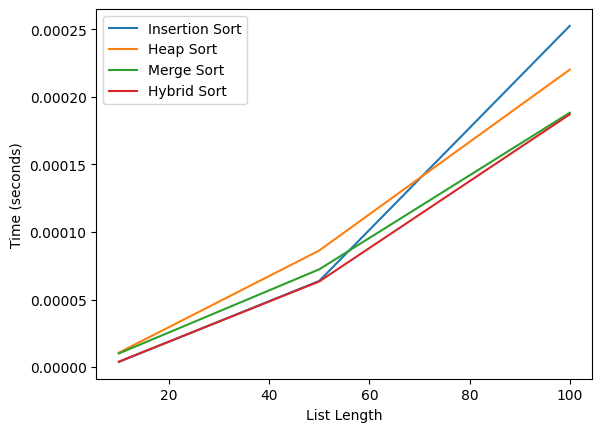

In [ ]:
# Run the experiment
list_lengths = [10, 50, 100]
num_runs = 100
results = run_experiment(list_lengths, num_runs)

# Plot the results
for sort_name, times in results.items():
    plt.plot(list_lengths, times, label=sort_name)
plt.xlabel('List Length')
plt.ylabel('Time (seconds)')
plt.legend()
plt.show()

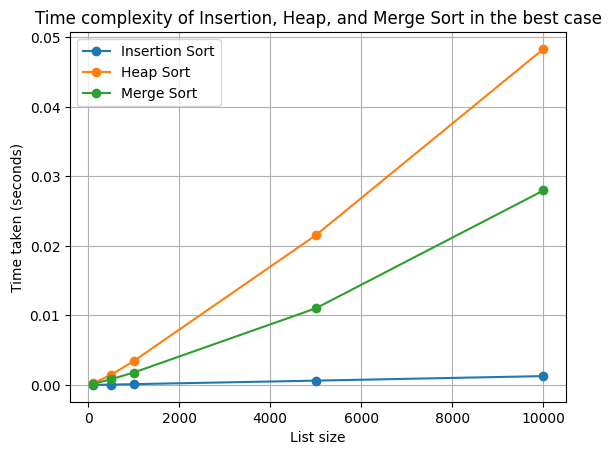

In [ ]:
sizes = [100, 500, 1000, 5000, 10000]

times_insertion = []
times_heap = []
times_merge = []

for n in sizes:
    arr = [i for i in range(n)]

    start_time = time.time()
    insertion_sort(arr.copy())
    end_time = time.time()
    times_insertion.append(end_time - start_time)

    start_time = time.time()
    heapsort(arr.copy())
    end_time = time.time()
    times_heap.append(end_time - start_time)

    start_time = time.time()
    mergeSort(arr.copy())
    end_time = time.time()
    times_merge.append(end_time - start_time)

plt.plot(sizes, times_insertion, marker='o', label='Insertion Sort')
plt.plot(sizes, times_heap, marker='o', label='Heap Sort')
plt.plot(sizes, times_merge, marker='o', label='Merge Sort')
plt.title('Time complexity of Insertion, Heap, and Merge Sort in the best case')
plt.xlabel('List size')
plt.ylabel('Time taken (seconds)')
plt.grid(True)
plt.legend()
plt.show()

**Reflection**:

In the three graphs produced we can see that for large list sizes insertion sort is by far the slowest when compared to Heap and Merge sort. However based on the second graph we can infer that insertion sort is better for smaller list sizes, in this case lists with 50 elements. The third graph shows the sorting times of the best case of insertion sort compared to heap and merge. The best case for insertion sort is when the list is already sorted and it is evident that it out performs both heap and merge sort.

**Team Contributions**: In below section describe in detail how you distributed the workload and contributions of each member in the task.

James: Parts A and E
Khaled: Parts D and F
Shravan: Parts B and C

---
---